In [ ]:
import os
import csv 
import numpy as np
import pandas as pd
import ast

import collections
from collections import OrderedDict
from collections import defaultdict


In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import urllib
import requests
import json
import shutil
import time
import fnmatch
from pathlib import Path
from requests_html import AsyncHTMLSession
from urllib.parse import urlparse
#from requests_html import HTMLSession

# import nest_asyncio
# nest_asyncio.apply()

In [ ]:
import pdfplumber
import nltk
import spacy
import gensim

from gensim.utils import simple_preprocess

from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z1936043\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#!pip3 install sklearn-pandas

In [ ]:
#!pip3 install -U sentence-transformers

In [ ]:
#!pip3 install pdfplumber

In [ ]:
#!pip3 install spacy 

In [ ]:
#!pip3 install requests_html

In [ ]:
#!pip3 install nltk

In [ ]:
#!pip3 install gensim

In [ ]:
#!pip3 install python-utils

In [ ]:
np.random.seed(0)

In [ ]:
# # This is my path
path="C:/Users/Z1936043/Documents/MJM/csci 637/Project/Topics" 
 
# to store files in a list
csv_list = []
 
# dirs=directories
for (root, dirs, files) in os.walk(path):
     for file in files:
            if '.csv' in file:
                file=root.replace("\\", "/")+"/"+file
               # print(root)
                csv_list.append(file)
print(len(csv_list))


345


In [ ]:
# data integration: merging csv files
df_articles = pd.concat(map(pd.read_csv, csv_list), ignore_index=True)


In [ ]:
#data duplicate removals
df_articles.drop_duplicates(inplace=True)
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215443 entries, 0 to 343560
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               215373 non-null  object 
 1   DOI                 215443 non-null  object 
 2   Journal             215443 non-null  object 
 3   Published           215443 non-null  object 
 4   Citation count      215443 non-null  int64  
 5   URL                 215443 non-null  object 
 6   Cited by source ID  215443 non-null  object 
 7   Cited by source     215443 non-null  object 
 8   Cited by title      215154 non-null  object 
 9   Cited by date       215443 non-null  object 
 10  Cited by type       215443 non-null  object 
 11  Cited by subtype    88120 non-null   object 
 12  Cited by country    215443 non-null  object 
 13  Cited by URL        215443 non-null  object 
 14  Document page       215443 non-null  object 
 15  Article funder(s)   23682 non-null

In [ ]:
df_articles.head()

,Title,DOI,Journal,Published,Citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,Cited by type,Cited by subtype,Cited by country,Cited by URL,Document page,Article funder(s),Unnamed: 0
0,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,thlfi,Terveyden ja hyvinvoinnin laitos,Ennen kuin on liian myöhäistä - Ehkäisevän mie...,2012-06-26,government,healthcare agency,Finland,http://www.julkari.fi/handle/10024/90874,https://www.overton.io/document.php?policy_doc...,NaN,NaN
1,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,A Comprehensive Framework for Marriage Education,2004-08-02,government,NaN,USA,https://www.acf.hhs.gov/opre/resource/a-compre...,https://www.overton.io/document.php?policy_doc...,NaN,NaN
2,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,Exploratory Study of Decision-Making in Low-In...,2010-12-02,government,NaN,USA,https://www.acf.hhs.gov/opre/resource/explorat...,https://www.overton.io/document.php?policy_doc...,NaN,NaN
3,The 2030 Problem: Caring for Aging Baby Boomers,10.1034/j.1600-0560.2002.56.x,Health Services Research,2002-08-01T00:00:00+00:00,7,https://doi.org/10.1034/j.1600-0560.2002.56.x,who,World Health Organization,Antibiotic prescribing in long-term care facil...,2021-10-13,igo,healthcare agency,IGO,https://apps.who.int/iris/handle/10665/346473,https://www.overton.io/document.php?policy_doc...,NaN,NaN
4,The 2030 Problem: Caring for Aging Baby Boomers,10.1034/j.1600-0560.2002.56.x,Health Services Research,2002-08-01T00:00:00+00:00,7,https://doi.org/10.1034/j.1600-0560.2002.56.x,stateofarizona,State of Arizona,Citizens Workgroup on the Long-Term Care Workf...,2005-04-27,government,NaN,USA,https://des.az.gov/file/2324/download,https://www.overton.io/document.php?policy_doc...,NaN,NaN


In [ ]:
#new csv file with unique entries
#df_articles.to_csv('unique.csv')

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
def getCitationLag(citation_date, publication_date):
    return (citation_date-publication_date).days

In [ ]:
df_articles['article_publish_year'] = pd.DatetimeIndex(df_articles['Published']).year
df_articles['article_publish_month'] = pd.DatetimeIndex(df_articles['Published']).month
df_articles['article_publish_day'] = pd.DatetimeIndex(df_articles['Published']).day

In [ ]:
df_articles['policy_citation_year'] = pd.DatetimeIndex(df_articles['Cited by date']).year
df_articles['policy_citation_month'] = pd.DatetimeIndex(df_articles['Cited by date']).month
df_articles['policy_citation_day'] = pd.DatetimeIndex(df_articles['Cited by date']).day

In [ ]:
df_articles['individual_citation_lag']=df_articles.apply(lambda x: getCitationLag(date(x['policy_citation_year'], x['policy_citation_month'],x['policy_citation_day']),date(x['article_publish_year'],x['article_publish_month'],x['article_publish_day'])),axis=1)

In [ ]:
# def getDate(input_date):
#     cited_by_date=datetime.strptime(input_date,'%Y-%m-%d')
#     year=cited_by_date.year
#     month=cited_by_date.month
#     day=cited_by_date.day
    
#     return (year,month,day)
   
# publish_date=df_articles['Published'][0].split("T")[0]
# y,m,d=getDate(publish_date)
# publication_date = date(y, m, d)
# #print(publication_date)

# cited_date=df_articles['Cited by date'][0]
# y1,m1,d1=getDate(cited_date)
# citation_date = date(y1, m1, d1)
# #print(citation_date)

# individual_citation_lag=getCitationLag(publication_date,citation_date)
# #print(citation_lag)

In [ ]:
df_articles.columns

Index(['Title', 'DOI', 'Journal', 'Published', 'Citation count', 'URL',
       'Cited by source ID', 'Cited by source', 'Cited by title',
       'Cited by date', 'Cited by type', 'Cited by subtype',
       'Cited by country', 'Cited by URL', 'Document page',
       'Article funder(s)', 'Unnamed: 0', 'article_publish_year',
       'article_publish_month', 'article_publish_day', 'policy_citation_year',
       'policy_citation_month', 'policy_citation_day',
       'individual_citation_lag'],
      dtype='object')

In [ ]:
#some articles got coted not only in policy documents from USA but also from other source
#df_articles["Cited by country"].value_counts() 

#df_articles[df_articles["policy_citation_year"]==1999]

In [ ]:
df_articles["policy_citation_year"]

0         2012
1         2004
2         2010
3         2021
4         2005
          ... 
343556    2021
343557    2021
343558    2021
343559    2021
343560    2020
Name: policy_citation_year, Length: 215443, dtype: int64

In [ ]:
#df=usa_data[(usa_data['individual_citation_lag']>=0) & (usa_data['article_publish_year']>=2000) & (usa_data['policy_citation_year']>=2000)]

In [ ]:
usa_data=df_articles[(df_articles["Cited by country"]=='USA') & (df_articles["policy_citation_year"]>=2000) & (df_articles['individual_citation_lag']>=0) & (df_articles['article_publish_year']>=2000)]


In [ ]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98315 entries, 1 to 343560
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    98252 non-null  object 
 1   DOI                      98315 non-null  object 
 2   Journal                  98315 non-null  object 
 3   Published                98315 non-null  object 
 4   Citation count           98315 non-null  int64  
 5   URL                      98315 non-null  object 
 6   Cited by source ID       98315 non-null  object 
 7   Cited by source          98315 non-null  object 
 8   Cited by title           98136 non-null  object 
 9   Cited by date            98315 non-null  object 
 10  Cited by type            98315 non-null  object 
 11  Cited by subtype         39308 non-null  object 
 12  Cited by country         98315 non-null  object 
 13  Cited by URL             98315 non-null  object 
 14  Document page        

In [ ]:
#unique_usa_data= usa_data.drop_duplicates(subset=['DOI'])

In [ ]:
lag_stat_data=usa_data.groupby(['DOI'])['individual_citation_lag'].agg({"min","mean","max"}).reset_index()
lag_stat_data
unique_usa_data=usa_data.merge(lag_stat_data, on='DOI')
#unique_article_data=unique_usa_data.drop_duplicates('DOI').reset_index(drop=True)

In [ ]:
unique_usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98315 entries, 0 to 98314
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    98252 non-null  object 
 1   DOI                      98315 non-null  object 
 2   Journal                  98315 non-null  object 
 3   Published                98315 non-null  object 
 4   Citation count           98315 non-null  int64  
 5   URL                      98315 non-null  object 
 6   Cited by source ID       98315 non-null  object 
 7   Cited by source          98315 non-null  object 
 8   Cited by title           98136 non-null  object 
 9   Cited by date            98315 non-null  object 
 10  Cited by type            98315 non-null  object 
 11  Cited by subtype         39308 non-null  object 
 12  Cited by country         98315 non-null  object 
 13  Cited by URL             98315 non-null  object 
 14  Document page         

In [ ]:
unique_usa_data.head()

,Title,DOI,Journal,Published,Citation count,URL,Cited by source ID,Cited by source,Cited by title,Cited by date,...,article_publish_year,article_publish_month,article_publish_day,policy_citation_year,policy_citation_month,policy_citation_day,individual_citation_lag,mean,max,min
0,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,A Comprehensive Framework for Marriage Education,2004-08-02,...,2000,1,1,2004,8,2,1675,2831.5,3988,1675
1,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,Exploratory Study of Decision-Making in Low-In...,2010-12-02,...,2000,1,1,2010,12,2,3988,2831.5,3988,1675
2,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,A Comprehensive Framework for Marriage Education,2004-08-02,...,2000,1,1,2004,8,2,1675,2831.5,3988,1675
3,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,2000-01-01T00:00:00+00:00,3,https://doi.org/10.1037/0893-3200.14.1.59,opregovus,OPRE,Exploratory Study of Decision-Making in Low-In...,2010-12-02,...,2000,1,1,2010,12,2,3988,2831.5,3988,1675
4,The 2030 Problem: Caring for Aging Baby Boomers,10.1034/j.1600-0560.2002.56.x,Health Services Research,2002-08-01T00:00:00+00:00,7,https://doi.org/10.1034/j.1600-0560.2002.56.x,stateofarizona,State of Arizona,Citizens Workgroup on the Long-Term Care Workf...,2005-04-27,...,2002,8,1,2005,4,27,1000,1000.0,1000,1000


In [ ]:
#yearly number of articles that got policy citations
#yearly citation count of articles 
#yearly_articles_counts=unique_usa_data["policy_citation_year"].value_counts().sort_index()
yearly_policy_citation_counts=unique_usa_data["policy_citation_year"].value_counts().sort_index()

In [ ]:
yearly_policy_citation_counts

2000       18
2001      127
2002      227
2003      472
2004      804
2005      863
2006     1109
2007     1897
2008     2183
2009     2559
2010     3074
2011     3808
2012     4127
2013     5734
2014     7550
2015     7015
2016     9494
2017    12419
2018    10166
2019    10921
2020     7850
2021     5107
2022      791
Name: policy_citation_year, dtype: int64

In [ ]:
# fig, ax = plt.subplots(figsize = (15,10))
# sns.set_theme(style="darkgrid")
# ax = sns.countplot(x="policy_citation_year", data=unique_usa_data, edgecolor=sns.color_palette("dark", 3)) #color=(0.1, 0.1, 0.2, 0.2)
# ax.tick_params(labelsize=12)
# ax.set_title('yearly policy citation counts of articles from Jan 1, 2000 to April 8, 2022',fontdict= { 'fontsize': 15}, y =1.03)
# #ax.set_xlabel('Response',fontsize = 18 )
# # ax.set_ylabel('Count',fontsize = 18 )
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
# ax.tick_params(labelsize=12)

# plt.show()

In [ ]:
# from matplotlib import pyplot as plt
# from matplotlib.pyplot import figure
# import numpy as np
# figure(num=None, figsize=(20, 10))
# #ADD global
# yearly_citation_counts.plot.bar( rot=45,color=(0.1, 0.1, 0.2, 0.2),  edgecolor='blue' )
# #plt.yscale('log')
# #plt.legend([''])
# plt.ylabel('number of articles', fontsize=15)
# plt.xlabel('years', fontsize=15)
# plt.title("yearly policy citation counts of articles from Jan 1, 2000 to April 8, 2022", fontsize=15)
# plt.show()


In [ ]:
unique_article_data=unique_usa_data.drop_duplicates('DOI').reset_index(drop=True)

yearly_published_article_count= unique_article_data['article_publish_year'].value_counts().sort_index()             #unique_article_data.groupby(['article_publish_year']).agg({'Citation count': sum})

yearly_published_article_count

2000    1456
2001    1523
2002    1555
2003    1537
2004    1750
2005    1754
2006    1821
2007    1872
2008    1866
2009    1855
2010    1933
2011    1838
2012    1849
2013    1958
2014    1757
2015    1874
2016    1870
2017    1446
2018    1268
2019    1086
2020     843
2021     356
2022       3
Name: article_publish_year, dtype: int64

In [ ]:
USA_policy_summary_data = pd.read_csv('all policy.csv')

In [ ]:
USA_policy_summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   journal                      500 non-null    object 
 1   journal_count                500 non-null    int64  
 2   publisher                    500 non-null    object 
 3   publisher_count              500 non-null    int64  
 4   type                         26 non-null     object 
 5   type_count                   25 non-null     float64
 6   Cited_by_type                4 non-null      object 
 7   Cited_by_type_count          4 non-null      object 
 8   cited_by_policy_source_type  31 non-null     object 
 9   policy_source_type_count     31 non-null     float64
 10  publication year             23 non-null     float64
 11  year_publication_count       23 non-null     float64
 12  cited_in_years               23 non-null     float64
 13  year_citation_count 

In [ ]:
USA_policy_summary_data.head()

,journal,journal_count,publisher,publisher_count,type,type_count,Cited_by_type,Cited_by_type_count,cited_by_policy_source_type,policy_source_type_count,publication year,year_publication_count,cited_in_years,year_citation_count,citing_topics,citing_topics_count,with_journal_subject,journal_subject_count,medline_types,medline_types_count
0,Unknown,20721,Elsevier BV,237471,journal-article,995620.0,GOVERNMENT,"663,441",government,663441.0,2022.0,505.0,2022.0,42129.0,Health,740737,"Public Health, Environmental and Occupational ...",60458.0,Journal Article,637861.0
1,Cochrane Database of Systematic Reviews,12169,Wiley,143508,book-chapter,27840.0,IGO,"177,730",other,401253.0,2021.0,7237.0,2021.0,158089.0,Medicine,603140,Economics and Econometrics,52749.0,"Research Support, Non-U.S. Gov't",263026.0
2,SSRN Electronic Journal,8861,Springer Science and Business Media LLC,68618,report,15582.0,THINK TANK,"368,813",other > aggregator,401253.0,2020.0,20322.0,2020.0,215086.0,Health care,574897,Psychiatry and Mental Health,43064.0,Review,107019.0
3,PLOS ONE,8659,Informa UK Limited,58057,book,9984.0,OTHER,"401,253",think tank,368813.0,2019.0,23933.0,2019.0,262016.0,Medical specialties,573817,Oncology,37012.0,Randomized Controlled Trial,95622.0
4,New England Journal of Medicine,6285,Oxford University Press (OUP),56441,proceedings-article,9666.0,NaN,NaN,government > healthcare agency,264953.0,2018.0,35869.0,2018.0,264796.0,Health sciences,567412,Medicine (all),35867.0,Comparative Study,76111.0


In [ ]:
yearly_data=USA_policy_summary_data[USA_policy_summary_data['publication year'].between(2000,2022)]
#x=yearly_data[['publication year','year_publication_count','year_citation_count']].set_index('publication year',drop=True).sort_index()
new_yearly_data=yearly_data[['publication year','year_publication_count','year_citation_count']].set_index('publication year',drop=True).sort_index()
new_yearly_data

,year_publication_count,year_citation_count
publication year,,
2000.0,38507.0,1560.0
2001.0,39844.0,5511.0
2002.0,43030.0,27967.0
2003.0,46152.0,13298.0
2004.0,49576.0,20079.0
2005.0,53941.0,25690.0
2006.0,56450.0,36919.0
2007.0,58143.0,47977.0
2008.0,60108.0,56590.0


In [ ]:
article_count_data=pd.concat([new_yearly_data, pd.DataFrame(yearly_published_article_count), pd.DataFrame(yearly_policy_citation_counts)], axis=1)#.rename(columns={"policy_citation_year": "yearly_policy_citations"})
article_count_data=article_count_data.rename(columns={'year_publication_count': 'yearly_article_publication_count','year_citation_count':'yearly_policy_citations','article_publish_year':'yearly_article_publication_count (child and youth)', 'policy_citation_year':'yearly_policy_citations (child and youth)'})

In [ ]:
article_count_data.index=article_count_data.index.astype('int64')

In [ ]:
article_count_data.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022],
           dtype='int64')

In [ ]:
article_count_data

,yearly_article_publication_count,yearly_policy_citations,yearly_article_publication_count (child and youth),yearly_policy_citations (child and youth)
2000,38507.0,1560.0,1456,18
2001,39844.0,5511.0,1523,127
2002,43030.0,27967.0,1555,227
2003,46152.0,13298.0,1537,472
2004,49576.0,20079.0,1750,804
2005,53941.0,25690.0,1754,863
2006,56450.0,36919.0,1821,1109
2007,58143.0,47977.0,1872,1897
2008,60108.0,56590.0,1866,2183
2009,64469.0,74959.0,1855,2559


<Figure size 2160x720 with 0 Axes>

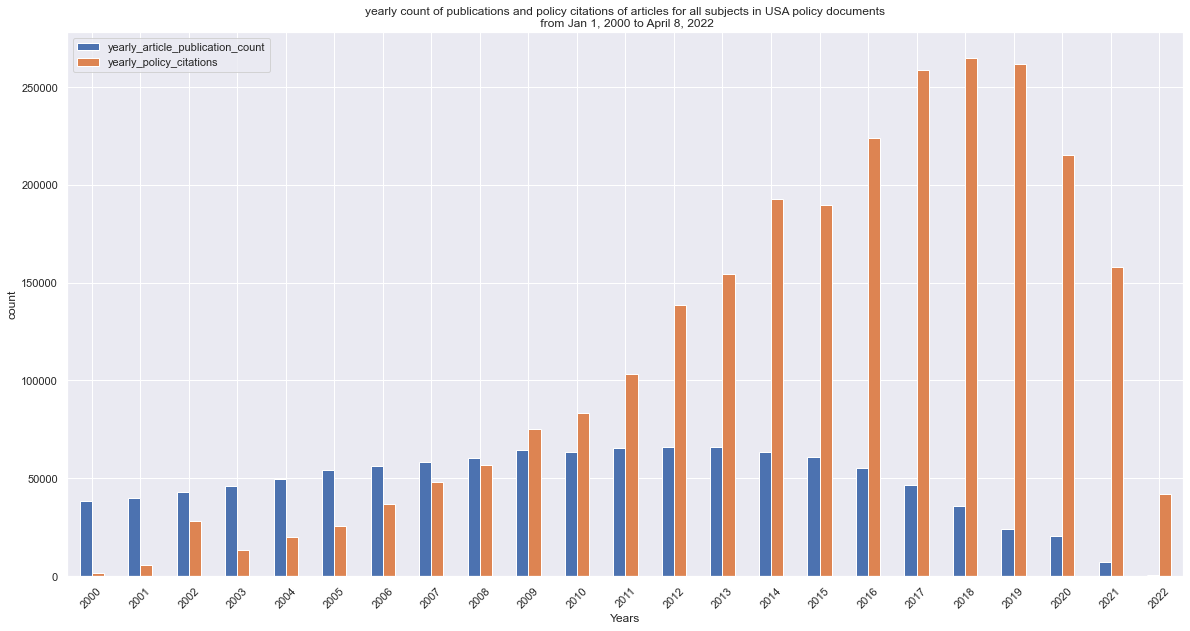

In [ ]:
# ax = article_count_data.plot.bar(rot=30, color=['darkgreen', 'crimson'])
# plt.tight_layout()
# plt.show()

#article_count_data[['yearly_article_publication_count','yearly_policy_citations']].columns

plt.figure(figsize = (30,10))
sns.set_theme(style="darkgrid")

plot_data=article_count_data[['yearly_article_publication_count','yearly_policy_citations']]
plot_data.plot(kind="bar", rot=45)
plt.gcf().set_size_inches(20, 10)
plt.title("Yearly publication count and policy citation count of articles for all subjects in the USA policy documents\n from January 1, 2000 to April 8, 2022")
plt.xlabel("Years")
plt.ylabel("count")
plt.savefig('publication and citation count(all).png')


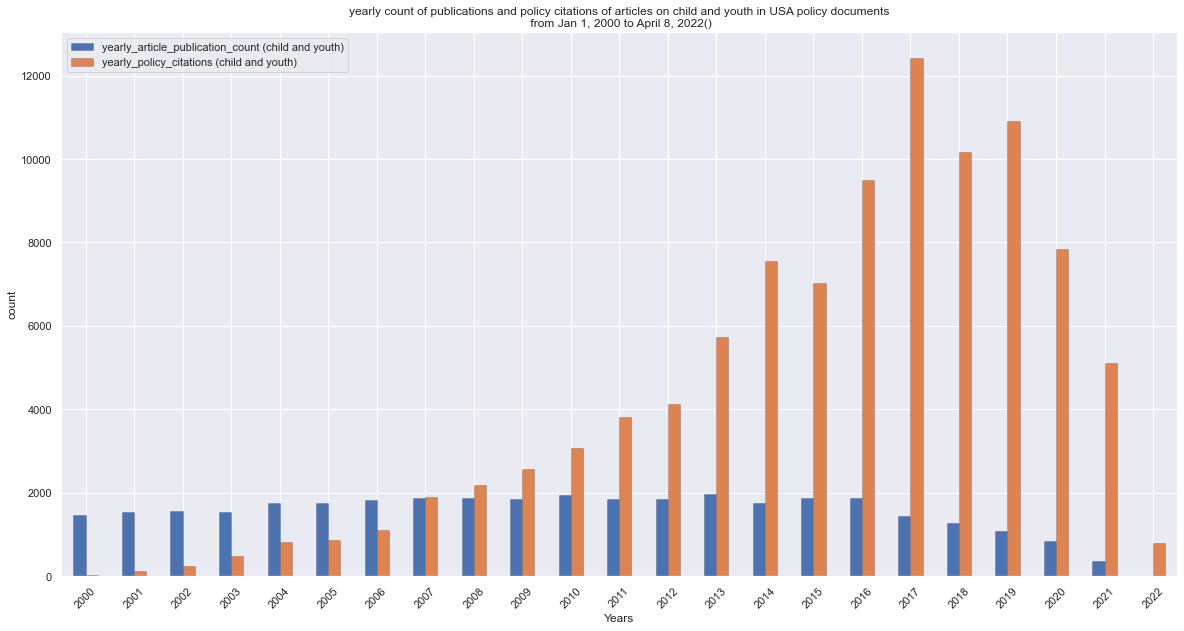

In [ ]:
#plt.figure(figsize = (30,10))
sns.set_theme(style="darkgrid")

plot_data=article_count_data[['yearly_article_publication_count (child and youth)','yearly_policy_citations (child and youth)']]
plot_data.plot(kind="bar", rot=45, edgecolor=(0.1, 0.1, 0.2, 0.2))
plt.gcf().set_size_inches(20, 10)
plt.title("Yearly publication count and policy citation count of articles on child and youth in the USA policy documents\n from January 1, 2000 to April 8, 2022")
plt.xlabel("Years")
plt.ylabel("count")
plt.savefig('publication and citation count(child youth).png')

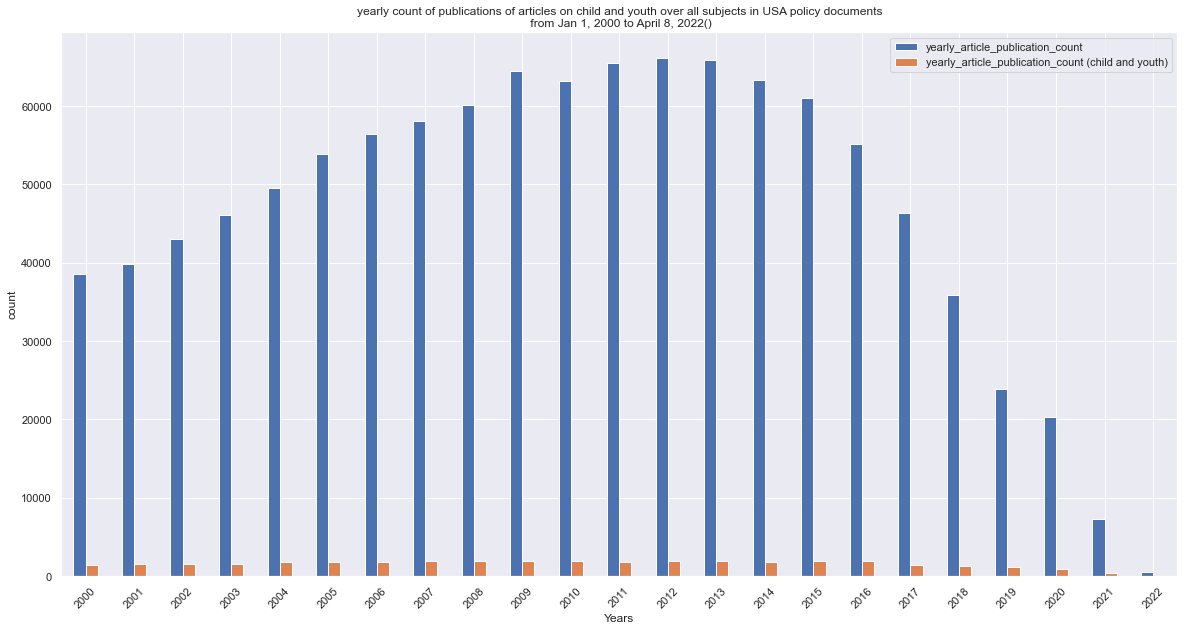

In [ ]:
sns.set_theme(style="darkgrid")

plot_data=article_count_data[['yearly_article_publication_count','yearly_article_publication_count (child and youth)',]]
plot_data.plot(kind="bar", rot=45)
plt.gcf().set_size_inches(20, 10)
plt.title("Yearly publication count of articles on child and youth over all subjects in the USA policy documents\n from January 1, 2000 to April 8, 2022")
plt.xlabel("Years")
plt.ylabel("count")
plt.savefig('publication count child vs all.png')

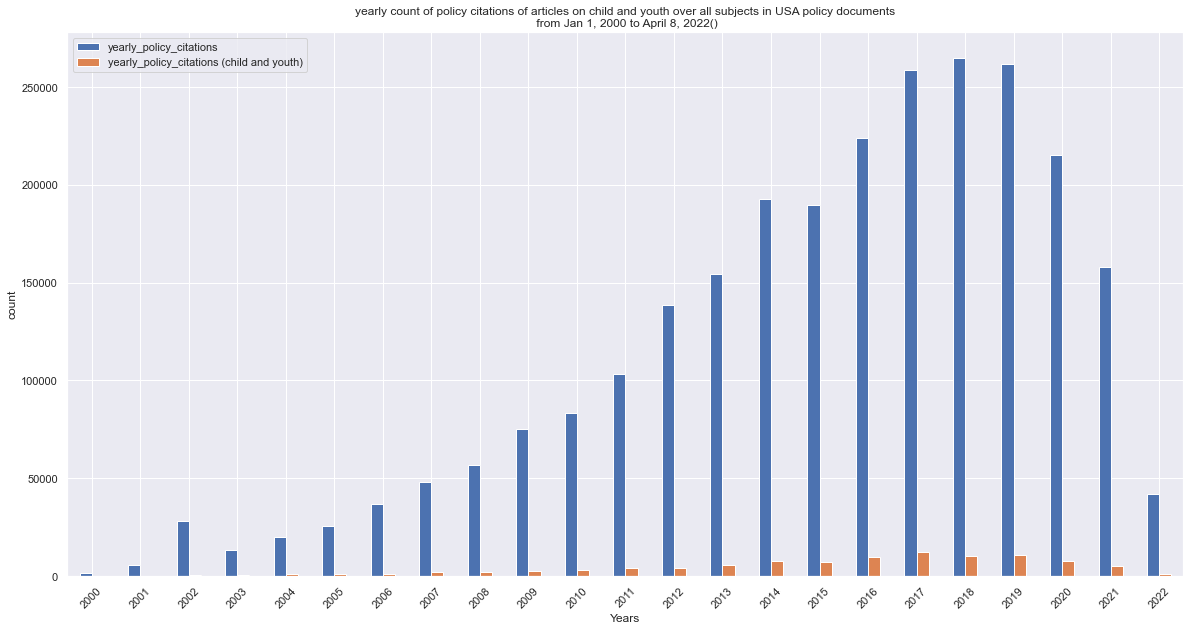

In [ ]:
sns.set_theme(style="darkgrid")

plot_data=article_count_data[['yearly_policy_citations','yearly_policy_citations (child and youth)']]
plot_data.plot(kind="bar", rot=45)
plt.gcf().set_size_inches(20, 10)
plt.title("Yearly policy citation count of articles on child and youth over all subjects in the USA policy documents\n from January 1, 2000 to April 8, 2022")
plt.xlabel("Years")
plt.ylabel("count")
plt.savefig('policy citations count child vs all.png')

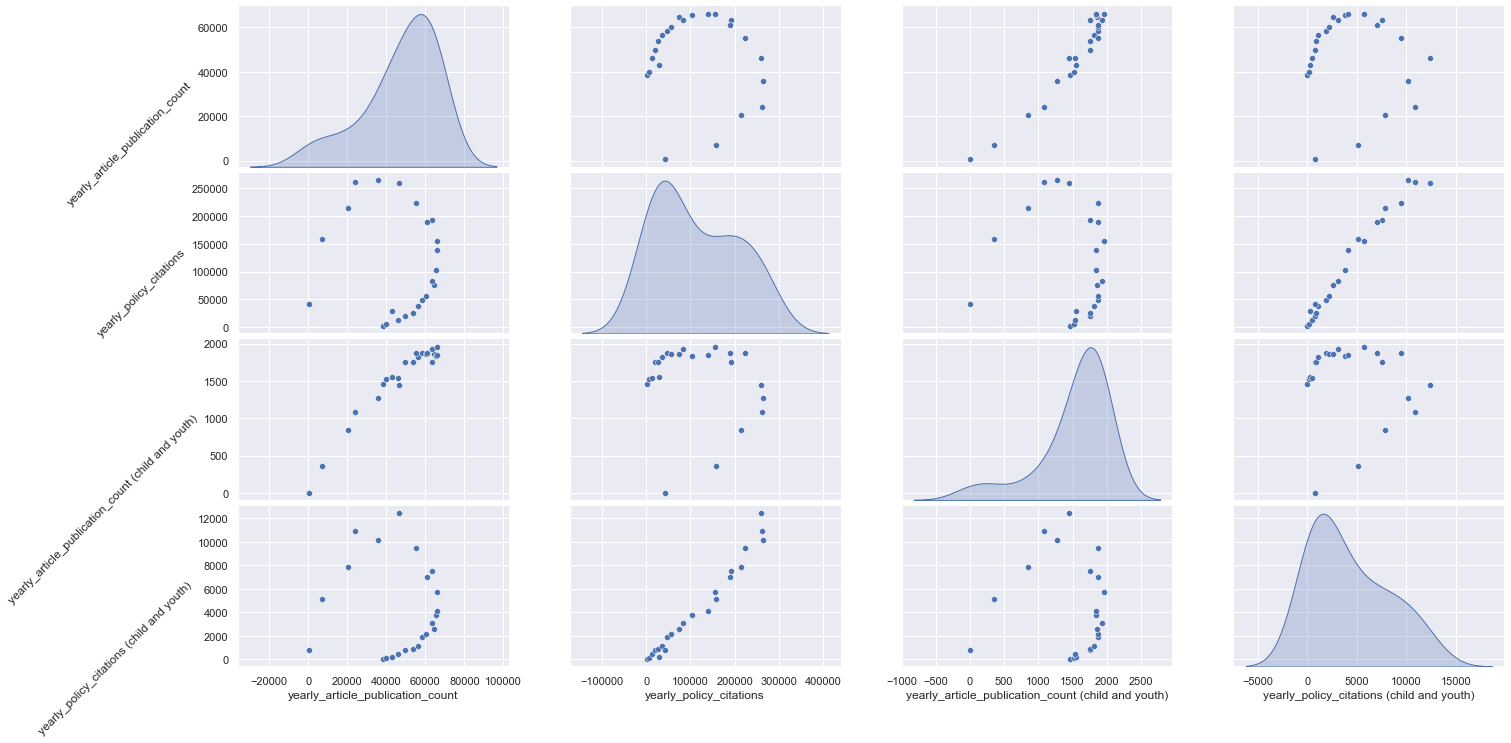

In [ ]:
sns.set_theme(style="darkgrid")
g=sns.pairplot(article_count_data, diag_kind='kde', corner=False)

plt.gcf().set_size_inches(20, 10)
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
       # ax.set_xlabel(ax.get_xlabel(), rotation = -30)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 45)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        plt.title('Pairwise relationships among policy citation count and publication count on all subjects and on children and youth in the USA policy documents\n from January 1, 2000 to April 8, 2022')
plt.savefig('Prelationships among policy citation and publication count.png')


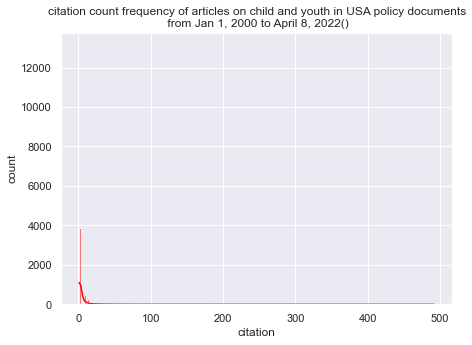

In [ ]:
sns.set_theme(style="darkgrid")
sns.histplot(data=unique_article_data, x="Citation count", color='red', kde=True) #'individual_citation_lag'

plt.gcf().set_size_inches(7, 5)
plt.title("Citation count frequency of articles on child and youth in the USA policy documents\n from January 1, 2000 to April 8, 2022", fontsize=12)
plt.xlabel("citation",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.savefig('citation count frequency.png')

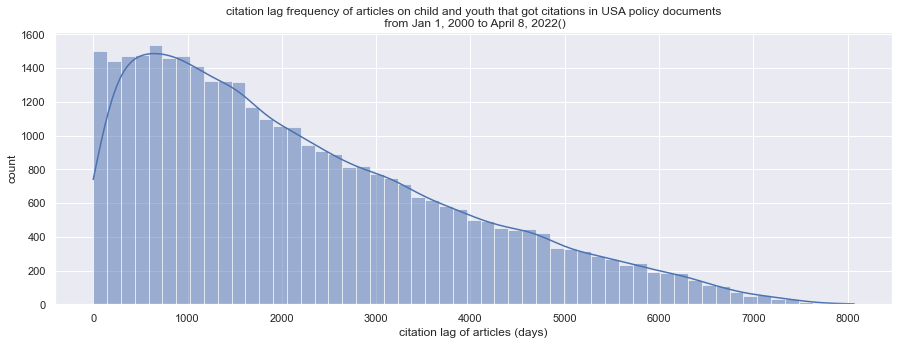

In [ ]:
sns.histplot(data=unique_article_data, x="individual_citation_lag", kde=True)
plt.gcf().set_size_inches(15, 5)
plt.title("Citation lag frequency of articles on child and youth that got citations in USA policy documents\n from January 1, 2000 to April 8, 2022", fontsize=12)
plt.xlabel("citation lag of articles (days)",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.savefig('citation lag frequency.png')

#plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0, title="years")

In [ ]:
unique_article_data['mean']=unique_article_data['mean'].astype("int64")
unique_article_data['min']=unique_article_data['min'].astype("int64")
unique_article_data['max']=unique_article_data['max'].astype("int64")

In [ ]:
# sns.set_theme(style="darkgrid")

# plot_data=unique_article_data[['individual_citation_lag','mean']]
# #plot_data.plot(kind="bar", rot=45)
# sns.countplot(plot_data, kind="bar", rot=45)
# plt.gcf().set_size_inches(20, 10)
# plt.title("Yearly count of publications of articles on child and youth over all subjects in USA policy documents\n from Jan 1, 2000 to April 8, 2022()")
# plt.xlabel("Years")
# plt.ylabel("count")

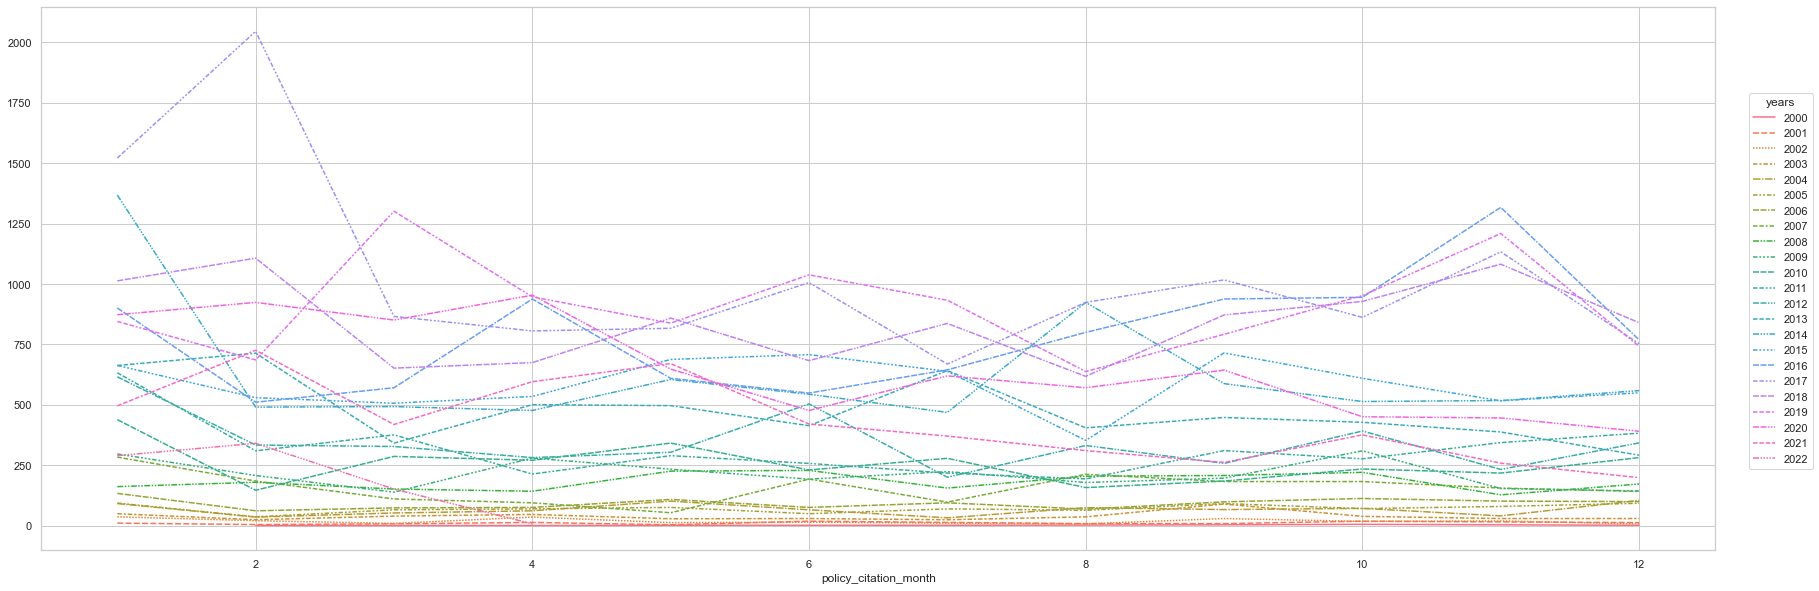

In [ ]:
usa_data2=unique_usa_data.groupby(['policy_citation_year','policy_citation_month']).size() #agg({'individual_citation_lag':'mean'}) usa_data2=usa_data.groupby(['policy_citation_month','policy_citation_year']).size()
usa_data2=usa_data2.unstack(level=0)
#print(usa_data2)
#print(usa_data2.columns)
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.figure(figsize = (30,10))

sns.lineplot(data=usa_data2)
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='lower left', borderaxespad=0, title="years")
plt.title("Monthly citation count of articles on child and youth in the USA policy documents\n from January 1, 2000 to April 8, 2022", fontsize=12)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Citation count", fontsize=12)
plt.savefig('monthly data.png')

#sns.lineplot(data=usa_data2, x="policy_citation_month", y="policy_citation_year", palette="Blues_d")

In [ ]:

# sns.barplot(x=yearly_policy_citations.index, y="Citation count", data=yearly_policy_citations, palette="Blues_d", edgecolor=".2", kde=True)
# plt.ylabel('citation counts',  fontsize = 15)
# plt.xlabel('years', fontsize = 15)


TASK 2: Citation count and citation lag prediction
    task 2.1: without similarity scores of articles and policy documents
    task 2.2: with similarity scores of articles and policy documents

task 2.1: without similarity scores of articles and policy documents

In [ ]:
unique_usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98315 entries, 0 to 98314
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    98252 non-null  object 
 1   DOI                      98315 non-null  object 
 2   Journal                  98315 non-null  object 
 3   Published                98315 non-null  object 
 4   Citation count           98315 non-null  int64  
 5   URL                      98315 non-null  object 
 6   Cited by source ID       98315 non-null  object 
 7   Cited by source          98315 non-null  object 
 8   Cited by title           98136 non-null  object 
 9   Cited by date            98315 non-null  object 
 10  Cited by type            98315 non-null  object 
 11  Cited by subtype         39308 non-null  object 
 12  Cited by country         98315 non-null  object 
 13  Cited by URL             98315 non-null  object 
 14  Document page         

In [ ]:
unique_usa_data['DOI'] = unique_usa_data['DOI'].str.strip(' / ')   
#df.loc[1,'DOI'].strip()
#https://doi.org/10.1034/j.1600-0560.2002.56.x

In [ ]:
new_altmetric_data=pd.DataFrame(unique_article_data['DOI'])

In [ ]:
new_altmetric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35070 entries, 0 to 35069
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DOI     35070 non-null  object
dtypes: object(1)
memory usage: 274.1+ KB


In [ ]:
#https://api.altmetric.com/v1/doi/10.1177/1524839919868222

In [ ]:
import time
api='https://api.altmetric.com/v1/doi/' 
unsuccess_doi_link={}
success_doi_link={}
# rest_usa_data=usa_data.iloc[53198:]\
# rest_usa_data1=usa_data.iloc[91363:]
#rest_usa_data2=usa_data.iloc[21355:53197]
# for row,doi in pl['DOI'].iteritems():
#     print(row, doi)
for row,doi in new_altmetric_data['DOI'].iteritems():
        #unique_usa_data.loc[row,'DOI'].strip(' / ')   
        link=api+doi
       # print(link, doi)
        start_time = time.perf_counter()
        response= requests.get(link)
        response_status=response.status_code
       # print(response_status)
        if  response_status!=200:
            unsuccess_doi_link[row]=response_status
        else:
            success_doi_link[row]=doi
            result = response.json()
            keys=sorted(result.keys())
            for key, value in result.items():
                if key not in new_altmetric_data:
                    new_altmetric_data[key]=str(np.nan)
                if(type(value)!=str):
                    value=str(value)
                new_altmetric_data.loc[row,key]= value
                
        elapsed_time = time.perf_counter() - start_time
        print(f" row {row}: Execution time: {elapsed_time:0.2f} seconds.")
        
#         if row==25:
#              break

#for doi in policy['DOI']
#doi='10.1186/s12889-016-3120-z'


In [ ]:
len(unsuccess_doi_link)

11676

In [ ]:
len(success_doi_link)

23394

In [ ]:
#unsuccess_doi_link

In [ ]:
new_altmetric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35070 entries, 0 to 35069
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   DOI                               35070 non-null  object
 1   title                             35070 non-null  object
 2   doi                               35070 non-null  object
 3   altmetric_jid                     35070 non-null  object
 4   issns                             35070 non-null  object
 5   journal                           35070 non-null  object
 6   cohorts                           35070 non-null  object
 7   context                           35070 non-null  object
 8   authors                           35070 non-null  object
 9   type                              35070 non-null  object
 10  altmetric_id                      35070 non-null  object
 11  schema                            35070 non-null  object
 12  is_oa             

In [ ]:
new_altmetric_data.loc[35069]


DOI                            10.1016/j.ijcha.2020.100600
title                                                  nan
doi                                                    nan
altmetric_jid                                          nan
issns                                                  nan
                                          ...             
cited_by_book_reviews_count                            nan
hlom_id                                                nan
hollis_id                                              nan
arxiv_id                                               nan
cited_by_syllabi_count                                 nan
Name: 35069, Length: 64, dtype: object

In [ ]:
success_doi_link[35067]

'10.1177/1524839919868222'

In [ ]:
unsuccess_doi_link[35069]

404

In [ ]:
new_altmetric_data['altmetric_id'].value_counts()
index_names = new_altmetric_data[new_altmetric_data['altmetric_id'] == 'nan'].index
new_altmetric_data1=new_altmetric_data.drop(index_names)
new_altmetric_data1.reset_index(drop=True, inplace=True)

In [ ]:
#new_altmetric_data1

In [ ]:

nan_data_dict=OrderedDict()
for col in new_altmetric_data1.columns:
     if('nan' in new_altmetric_data1[col].value_counts().index):
        nan_data_dict[col]= new_altmetric_data1[col].value_counts()['nan']
#         #print(type(usa_data[col].value_counts()))

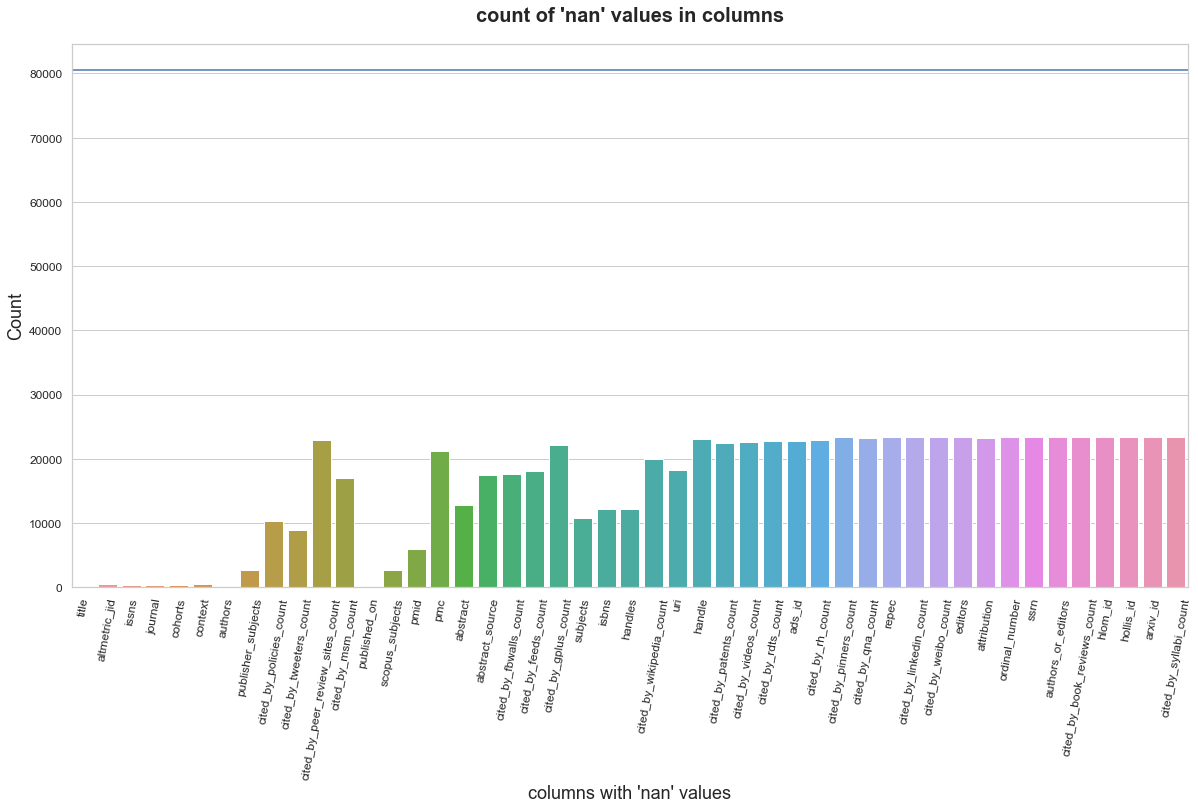

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
# g = sns.displot(data = penguins,
#                x = "flipper_length_mm",
#                col = "species")

keys = list(nan_data_dict.keys())
# get values in the same order as keys, and parse percentage values
vals = [nan_data_dict[k] for k in keys]
ax=sns.barplot(x=keys, y=vals)
# graph.axhline(80611)
ax.axhline(80611)

ax.set_title("count of 'nan' values in columns",fontdict= { 'fontsize': 20, 'fontweight':'bold'}, y =1.03)
ax.set_xlabel("columns with 'nan' values",fontsize = 18 )
ax.set_ylabel('Count',fontsize = 18 )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
ax.tick_params(labelsize=12)

#The plot is shown
plt.show()
plt.savefig("nan.png",format='png',dpi=150)

In [ ]:
filtered_columns = [k for k in keys if nan_data_dict[k]>10000]
remaining_columns=[k for k in keys if k not in filtered_columns]
filtered_columns
remaining_columns

['title',
 'altmetric_jid',
 'issns',
 'journal',
 'cohorts',
 'context',
 'authors',
 'publisher_subjects',
 'cited_by_tweeters_count',
 'published_on',
 'scopus_subjects',
 'pmid']

In [ ]:
new_altmetric_data1.drop(filtered_columns, axis=1, inplace=True)

In [ ]:
new_altmetric_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23394 entries, 0 to 23393
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DOI                      23394 non-null  object
 1   title                    23394 non-null  object
 2   doi                      23394 non-null  object
 3   altmetric_jid            23394 non-null  object
 4   issns                    23394 non-null  object
 5   journal                  23394 non-null  object
 6   cohorts                  23394 non-null  object
 7   context                  23394 non-null  object
 8   authors                  23394 non-null  object
 9   type                     23394 non-null  object
 10  altmetric_id             23394 non-null  object
 11  schema                   23394 non-null  object
 12  is_oa                    23394 non-null  object
 13  publisher_subjects       23394 non-null  object
 14  cited_by_posts_count     23394 non-nul

In [ ]:
#unique_usa_data1=unique_usa_data.copy(deep=False)
unique_usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98315 entries, 0 to 98314
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    98252 non-null  object 
 1   DOI                      98315 non-null  object 
 2   Journal                  98315 non-null  object 
 3   Published                98315 non-null  object 
 4   Citation count           98315 non-null  int64  
 5   URL                      98315 non-null  object 
 6   Cited by source ID       98315 non-null  object 
 7   Cited by source          98315 non-null  object 
 8   Cited by title           98136 non-null  object 
 9   Cited by date            98315 non-null  object 
 10  Cited by type            98315 non-null  object 
 11  Cited by subtype         39308 non-null  object 
 12  Cited by country         98315 non-null  object 
 13  Cited by URL             98315 non-null  object 
 14  Document page         

In [ ]:
unique_usa_data1=unique_usa_data.merge(new_altmetric_data1, on='DOI')

In [ ]:
unique_usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78253 entries, 0 to 78252
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    78222 non-null  object 
 1   DOI                      78253 non-null  object 
 2   Journal                  78253 non-null  object 
 3   Published                78253 non-null  object 
 4   Citation count           78253 non-null  int64  
 5   URL                      78253 non-null  object 
 6   Cited by source ID       78253 non-null  object 
 7   Cited by source          78253 non-null  object 
 8   Cited by title           78125 non-null  object 
 9   Cited by date            78253 non-null  object 
 10  Cited by type            78253 non-null  object 
 11  Cited by subtype         30360 non-null  object 
 12  Cited by country         78253 non-null  object 
 13  Cited by URL             78253 non-null  object 
 14  Document page         

In [ ]:
#unique_usa_data1.to_csv("Articles with altmetric details (Found_notFound).csv")

In [ ]:
unique_usa_data1=pd.read_csv('Articles with altmetric details (Found_notFound).csv')

In [ ]:
#data=pd.read_csv(Articles with altmetric details (Found_notFound).csv)
# unique_usa_data1['altmetric_id'].value_counts()
# index_names = unique_usa_data1[unique_usa_data1['altmetric_id'] == 'nan'].index
# index_names

In [ ]:
#unique_usa_data1.info()

In [ ]:
unique_usa_data1.drop(['Unnamed: 0','Published','URL', 'Cited by source', 'Cited by date', 'Cited by country', 'Document page','title','doi','altmetric_jid','issns', 'authors', 'altmetric_id', 'schema', 'details_url','images','pmid'], axis=1, inplace=True)
unique_usa_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78253 entries, 0 to 78252
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    78222 non-null  object 
 1   DOI                      78253 non-null  object 
 2   Journal                  78253 non-null  object 
 3   Citation count           78253 non-null  int64  
 4   Cited by source ID       78253 non-null  object 
 5   Cited by title           78125 non-null  object 
 6   Cited by type            78253 non-null  object 
 7   Cited by subtype         30360 non-null  object 
 8   Cited by URL             78253 non-null  object 
 9   Article funder(s)        7448 non-null   object 
 10  Unnamed: 0.1             6151 non-null   float64
 11  article_publish_year     78253 non-null  int64  
 12  article_publish_month    78253 non-null  int64  
 13  article_publish_day      78253 non-null  int64  
 14  policy_citation_year  

In [ ]:
#unique_usa_data1.drop('Unnamed: 0.1',  axis=1, inplace=True)
#unique_usa_data1.info()

In [ ]:
rename_col={'mean': 'mean_citation_lag',
        'max': 'max_citation_lag',
        'min': 'min_citation_lag'}
unique_usa_data1.rename(columns=rename_col, inplace=True)

In [ ]:
#unique_usa_data1['last_updated'].value_counts()

In [ ]:
blank_data_dict=OrderedDict()
for col in unique_usa_data1.columns:
     if('[]' in unique_usa_data1[col].value_counts().index):
        blank_data_dict[col]= unique_usa_data1[col].value_counts()['[]']
#         #print(type(usa_data[col].value_counts()))

In [ ]:
print(blank_data_dict)

OrderedDict([('cohorts', 26376), ('publisher_subjects', 31)])


In [ ]:
unique_usa_data1=unique_usa_data1[unique_usa_data1['publisher_subjects']!='[]'] # remove articles that have empty publisher subjects 
#len(dois)
#unique_usa_data1=unique_usa_data1[unique_usa_data1['DOI'].isin(dois)==False] // remove articles that have empty publisher subjects 
#unique_usa_data1[unique_usa_data1['DOI'].isin(dois)]

In [ ]:
#unique articles only
unique_articles_data=unique_usa_data1.groupby('DOI', as_index=False).first()

citations=unique_articles_data['Citation count'].value_counts()
citations.sort_index()

1      6558
2      4147
3      2693
4      1876
5      1287
       ... 
443       1
453       1
465       1
480       1
492       1
Name: Citation count, Length: 196, dtype: int64

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

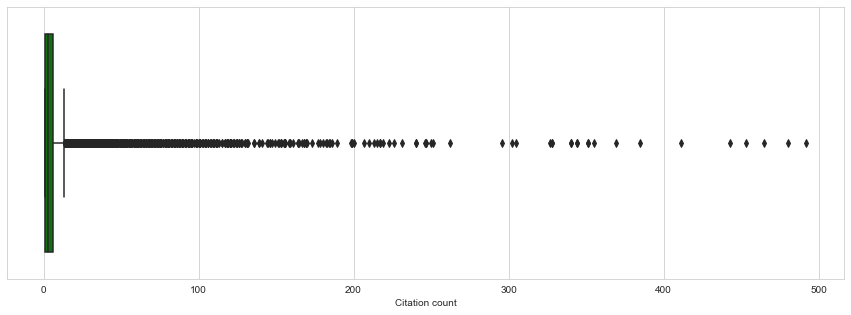

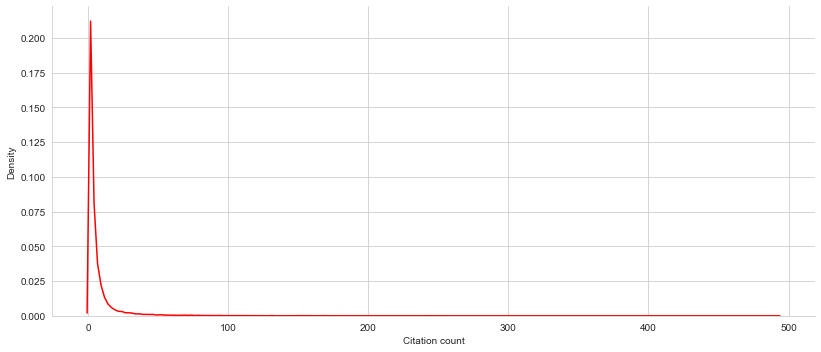

In [ ]:
sns.set_style(style="whitegrid")

#%matplotlib inline
#sns.set_theme(style="darkgrid")
#sns.set_palette("red")

sns.boxplot(unique_articles_data['Citation count'], color='green')
plt.gcf().set_size_inches(15, 5)
sns.displot(unique_articles_data['Citation count'], kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(13, 5)

In [ ]:
unique_articles_data1=unique_articles_data[unique_articles_data['Citation count'].isin(citations[(citations.index>=0) & (citations.index<=8)].index)] # filter out twitter posts count with frequencies less than 20
#usa_data1=usa_data1[~usa_data1['Citation count'].isin(citations[(citations.values<10)].index)] #usa_data1[usa_data1['Citation count']<20] # filter out twitter posts count having values greater than 50
unique_articles_data1['Citation count'].value_counts()

1    6558
2    4147
3    2693
4    1876
5    1287
6    1003
7     754
8     654
Name: Citation count, dtype: int64

In [ ]:
#citations[(citations.index>=0) & (citations.index<=20)].index

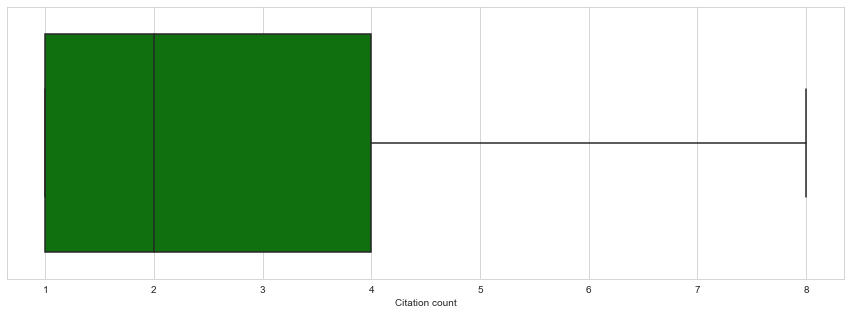

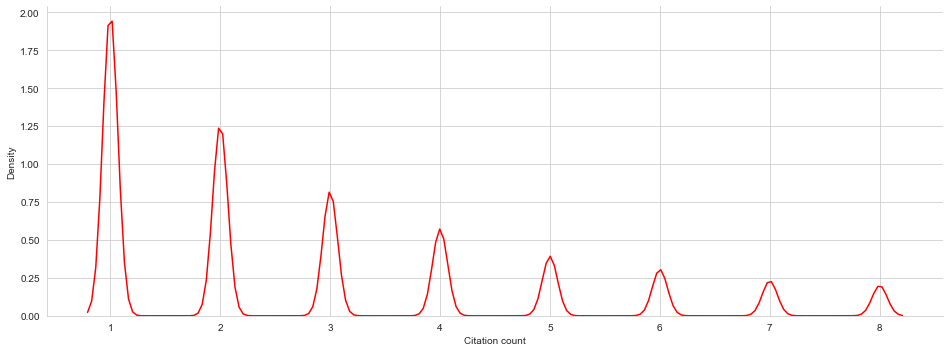

In [ ]:
sns.set_style(style="whitegrid")

#%matplotlib inline
#sns.set_theme(style="darkgrid")
#sns.set_palette("red")

sns.boxplot(unique_articles_data1['Citation count'], color='green')
plt.gcf().set_size_inches(15, 5)
sns.displot(unique_articles_data1['Citation count'], kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(15, 5)

In [ ]:
unique_usa_data2=(unique_usa_data1[(unique_usa_data1['Citation count']>=1) & (unique_usa_data1['Citation count']<9)]).reset_index(drop=True) # only consider articles that have citations between 1 to 8 


In [ ]:
#unique_usa_data2.loc[6].equals(unique_usa_data2.loc[7])

In [ ]:
unique_usa_data2.drop_duplicates(inplace=True)

In [ ]:
unique_usa_data2.reset_index(drop=True, inplace=True)

In [ ]:
unique_usa_data2.describe()

,Unnamed: 0,Citation count,article_publish_year,article_publish_month,article_publish_day,policy_citation_year,policy_citation_month,policy_citation_day,individual_citation_lag,mean_citation_lag,max_citation_lag,min_citation_lag,cited_by_posts_count,cited_by_tweeters_count,cited_by_accounts_count,last_updated,score,added_on,published_on,readers_count
count,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,35212.000000,20945.000000,35212.000000,3.521200e+04,35212.000000,3.521200e+04,3.507400e+04,35212.000000
mean,46379.985232,3.642025,2010.613910,6.101812,3.020817,2016.204845,6.050551,14.881574,2052.426786,2052.426786,2478.058758,1610.943144,32.390605,34.652471,26.271385,1.507178e+09,41.446517,1.466709e+09,1.305706e+09,127.633278
std,24144.838720,2.201610,5.657994,3.653552,5.929393,3.915568,3.589356,9.305631,1614.917226,1492.774476,1758.671557,1408.610521,361.734571,338.493643,269.592405,1.236733e+08,206.141798,7.984024e+07,1.734219e+08,148.734956
min,0.000000,1.000000,2000.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.942240e+08,0.250000,1.313023e+09,8.441280e+08,0.000000
25%,20092.750000,2.000000,2006.000000,3.000000,1.000000,2014.000000,3.000000,6.000000,757.000000,859.666667,1027.000000,536.000000,2.000000,2.000000,1.000000,1.438270e+09,3.000000,1.409528e+09,1.169294e+09,50.000000
50%,52654.500000,3.000000,2011.000000,6.000000,1.000000,2017.000000,6.000000,15.000000,1632.000000,1721.000000,2123.000000,1194.000000,4.000000,4.000000,3.000000,1.534957e+09,6.000000,1.472732e+09,1.330560e+09,90.000000
75%,66962.750000,5.000000,2015.000000,9.000000,1.000000,2019.000000,9.000000,23.000000,3023.000000,2956.083333,3677.250000,2308.000000,11.000000,12.000000,9.000000,1.609459e+09,16.071000,1.513180e+09,1.448582e+09,156.000000
max,78252.000000,8.000000,2022.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,8070.000000,8070.000000,8070.000000,8070.000000,47127.000000,31199.000000,31390.000000,1.651412e+09,11001.674000,1.651404e+09,1.669853e+09,3907.000000


In [ ]:
unique_usa_data2.columns

Index(['Unnamed: 0', 'Title', 'DOI', 'Journal', 'Citation count',
       'Cited by source ID', 'Cited by title', 'Cited by type',
       'Cited by subtype', 'Cited by URL', 'Article funder(s)',
       'article_publish_year', 'article_publish_month', 'article_publish_day',
       'policy_citation_year', 'policy_citation_month', 'policy_citation_day',
       'individual_citation_lag', 'mean_citation_lag', 'max_citation_lag',
       'min_citation_lag', 'journal', 'cohorts', 'context', 'type', 'is_oa',
       'publisher_subjects', 'cited_by_posts_count', 'cited_by_tweeters_count',
       'cited_by_accounts_count', 'last_updated', 'score', 'history', 'url',
       'added_on', 'published_on', 'scopus_subjects', 'readers',
       'readers_count'],
      dtype='object')

In [ ]:
unique_usa_data2.drop('Unnamed: 0',  axis=1, inplace=True)

In [ ]:
unique_usa_data2.columns

Index(['Title', 'DOI', 'Journal', 'Citation count', 'Cited by source ID',
       'Cited by title', 'Cited by type', 'Cited by subtype', 'Cited by URL',
       'Article funder(s)', 'article_publish_year', 'article_publish_month',
       'article_publish_day', 'policy_citation_year', 'policy_citation_month',
       'policy_citation_day', 'individual_citation_lag', 'mean_citation_lag',
       'max_citation_lag', 'min_citation_lag', 'journal', 'cohorts', 'context',
       'type', 'is_oa', 'publisher_subjects', 'cited_by_posts_count',
       'cited_by_tweeters_count', 'cited_by_accounts_count', 'last_updated',
       'score', 'history', 'url', 'added_on', 'published_on',
       'scopus_subjects', 'readers', 'readers_count'],
      dtype='object')

In [ ]:
unique_doi_list=list(unique_usa_data2['DOI'].value_counts().index)

In [ ]:
len(unique_doi_list)

18973

In [ ]:
unique_doi_list[17215]

'10.1111/j.1746-1561.2011.00661.x'

#code for downloading articles

In [ ]:
#unique_usa_data2.to_csv("Articles for pdfs and prediction.csv")
unique_usa_data2=pd.read_csv('Articles for pdfs and prediction.csv')

NameError: ignored

In [ ]:
unique_usa_data2.info()

In [ ]:
unique_usa_data2.drop('Unnamed: 0',  axis=1, inplace=True)

In [ ]:
article_policy_dict=collections.defaultdict(list)

In [ ]:
article_list=OrderedDict() #collections.defaultdict(string)
policy_list=OrderedDict() #collections.defaultdict(string)

In [ ]:
successful_articles=OrderedDict()
unsuccessful_articles=[]

In [ ]:
for row,doi in enumerate(unique_usa_data2['DOI']):
    article_policy_dict[unique_usa_data2.loc[row,'url']].append(unique_usa_data2.loc[row,'Cited by URL'])

In [ ]:
#article_policy_dict1=pd.DataFrame.from_dict(article_policy_dict, orient='index')
#article_policy_dict1.to_csv('article_policy_dict.csv')
#article_policy_dict1.notnull().sum(axis = 0)
#article_policy_dict1.isnull().sum(axis = 0)

In [ ]:
articlepolicy=pd.read_csv("article_policy_dict.csv")

In [ ]:
articlepolicy1=articlepolicy.set_index('Unnamed: 0').T.to_dict('list')
articlepolicy2=collections.defaultdict(list)
for key, values in articlepolicy1.items(): 
    articlepolicy2[key]=list(dict.fromkeys(values))

In [ ]:
s=pd.read_csv("successful_articles1.csv")

In [ ]:
s.drop("Unnamed: 0", axis=1, inplace=True)


In [ ]:
success=s.set_index('dois').T.to_dict('list')

In [ ]:
#success

In [ ]:
for index, article_url in enumerate(article_policy_dict):
    if index==17124:
        print(article_url)
        break

In [ ]:
#s.head()

In [ ]:
#articlepolicy2=artcile_policy
#s=successful_articles1

In [ ]:
#article_policy_dict['http://dx.doi.org/10.1111/cdev.13296'][0]==(article_policy_dict['http://dx.doi.org/10.1111/cdev.13296'][1])

In [ ]:
# #unsuccess
# http://dx.doi.org/10.1001/archotol.126.1.36
# https://jamanetwork.com/journals/jamaotolaryngology/fullarticle/404076
# https://jamanetwork.com/journals/jamaotolaryngology/articlepdf/404076/ooa90105.pdf

# http://dx.doi.org/10.1093/geront/40.1.18
# https://academic.oup.com/gerontologist/article/40/1/18/720552
# https://academic.oup.com/gerontologist/article-pdf/40/1/18/19445483/18.pdf
for index, article_url in enumerate(article_policy_dict):
    if index==17124:
        print(article_url)
        break
#http://dx.doi.org/10.1177/0003122415590627
#http://dx.doi.org/10.1093/acprof:oso/9780199929382.003.0007

In [ ]:
# if 'http://dx.doi.org/10.1016/j.envint.2013.02.011' in unsuccessful_articles:
#     print('True')
# else:
#      print('False')
# #unsuccessful_articles.append('http://dx.doi.org/10.1016/j.envint.2013.02.011')

In [ ]:
#left blank

In [ ]:
#asession = AsyncHTMLSession()

Start downloading articles

In [ ]:
for index, file_name in enumerate(article_policy_dict):
    not_found=1
    if index>17215:
            url = str(file_name).strip()
           #print(url)
            try:
                    #response = session.get(url,headers={'User-Agent': 'Mozilla/5.0'}, allow_redirects=True) # Redirects help follow to the actual domain
                    start_time = time.perf_counter()
                    response = await asession.get(url,timeout=60, headers={'User-Agent': 'Mozilla/5.0'}, allow_redirects=True)
            except Exception as e:
                    print("Oops!", e.__class__, "occurred.")
                    not_found=1
            else:
                    links= response.html.absolute_links
                    if len(links): 
                        for file in links: 
                            #print("inside pdf file {}".format(file))
                            if (str(file).endswith(".pdf")):
                                try:
                                    r = requests.get(file, stream = True, verify=False, timeout=60,  headers={'User-Agent': 'Mozilla/5.0'}) 
                                except Exception as e:
                                    print("Oops!", e.__class__, "occurred.")
                                    # print("inside pdf file {}".format(file))
                                    not_found=1

                                else:
                                    r_status=r.status_code
                                    if  (r_status==200):
                                        pdf_title=f"{index}_{file.rsplit('/', 1)[-1].split('?')[0]}"
                                        try:
                                            with open(pdf_title, "wb") as new_pdf:
                                                new_pdf.write(r.content) 
                                                # print(f"Begin writing")
                                                # for chunk in response.iter_content(chunk_size=1024):
                                                #     if chunk:
                                                #         pdf.write(chunk)

                                        except Exception as e:
                                            print("Oops!", e.__class__, "occurred.")
                                            not_found=1

                                        else:
                                            successful_articles[url]=pdf_title
                                            print(f"successful {url}")
                                            not_found=0
                                            break;
                                    else: 
                                        not_found=1    

                            else:
                                not_found=1

                    else:
                        not_found=1
                    if (not_found):  
                        print(f"unsuccessful {url}")
                        unsuccessful_articles.append(url)

                    elapsed_time = time.perf_counter() - start_time
                    print(f"Execution time: {elapsed_time:0.2f} seconds.")  
                    #break

In [ ]:
article_policy=collections.defaultdict(list)
for key, values in article_policy_dict.items(): 
    article_policy[key]=list(dict.fromkeys(values))

In [ ]:
print(len(successful_articles))
print(len(unsuccessful_articles))

In [ ]:
successful_articles1=successful_articles.copy()
print(len(successful_articles1))

In [ ]:
#successful_articles

In [ ]:
filter_list=['http://dx.doi.org/10.1371/journal.pone.0052155', 'http://dx.doi.org/10.1080/00918369.2018.1538407','http://dx.doi.org/10.1097/ta.0000000000000277','http://dx.doi.org/10.1093/infdis/jis233', 'http://dx.doi.org/10.1371/journal.pone.0173999',
'http://dx.doi.org/10.1097/htr.0b013e3181e5a87a','http://dx.doi.org/10.1899/12-132.1', 'http://dx.doi.org/10.2196/18898','http://dx.doi.org/10.5620/eht.2012.27.e2012005','http://dx.doi.org/10.2174/1874613601004010088','http://dx.doi.org/10.7717/peerj.1235',
'http://dx.doi.org/10.1097/iyc.0b013e3181abe169','http://dx.doi.org/10.1165/rcmb.2016-0256oc','http://dx.doi.org/10.1002/j.2048-7940.2009.tb00271.x','http://dx.doi.org/10.1097/pep.0b013e318218f149'] 
                                                         
#len(filter_list)   

In [ ]:
# for index, article_url in enumerate(article_policy_dict):
#     if index==17124:
#         print(article_url)
#         break

In [ ]:
# for index, article_url in enumerate(successful_articles1):
#         print(index, article_url, successful_articles1[article_url] )
        
#         if index==3:
#             break

In [ ]:
# for index, article_url in enumerate(article_policy):
#         print(index, article_url, article_policy['http://dx.doi.org/10.1093/geront/40.1.18'] )
#         break

In [ ]:
 for url in list(successful_articles1.keys()):
    pdf=successful_articles1[url].split('_')[1]
    if (url in filter_list or pdf.startswith("kf") or pdf.startswith('linkout') or pdf.startswith('StyleGuide') or pdf.startswith('scholar') or pdf.startswith('AAP') or pdf.startswith('GJ') or pdf.startswith('A.pdf') or pdf.startswith('B.pdf')):
        del successful_articles1[url]
    

In [ ]:
print(len(successful_articles1))

In [ ]:
domain_dict=collections.defaultdict(list)

for url in successful_articles1.keys():
    domain = url.split('/')[3]
    domain_dict[domain].append(url)
    domain_dict[domain]=list(dict.fromkeys(domain_dict[domain]))
    
#10.1542 672
#http://dx.doi.org/10.1542/peds.108.1.206
#10.1080 75
#10.1023 54

In [ ]:
if '10.1023' in list(domain_dict.keys()):
    #print (domain_dict['10.1023'])
    for url in list(successful_articles1.keys()):
        if url in domain_dict['10.1023']:
            del successful_articles1[url]
    del domain_dict['10.1023']

In [ ]:
print(len(successful_articles1))

In [ ]:
# sums=0
# count=0
# for key, values in domain_dict.items():
#         print(f"domain: {key} total: {len(values)}")
#         sums=sums+len(values)
#         count=count+1
# print(f"total unique articles: {sums}\nTotal unique domains: {count}")


In [ ]:
sums=0
count=0
for key, values in domain_dict.items():
    #print(key)
    if len(values)<50:
        for url in list(successful_articles1.keys()):
            if url in domain_dict[key]:
                del successful_articles1[url]
    else:
        print(f"domain: {key} total: {len(values)}")
        sums=sums+len(values)
        count=count+1
print(f"total articles: {sums}\nTotal domains: {count}")

In [ ]:
# s=pd.read_csv("successful_articles1.csv")
# s.info()

In [ ]:
print(len(successful_articles1))

In [ ]:
# successful_articles1_csv=pd.DataFrame.from_dict(successful_articles1, orient='index')
# successful_articles1_csv=successful_articles1_csv.reset_index()
# successful_articles1_csv=successful_articles1_csv.rename(columns={'index':'dois', 0:'pdf_name'})
# successful_articles1_csv

In [ ]:
# successful_articles1_csv.to_csv('successful_articles1.csv')

In [ ]:
policy_list=OrderedDict() #collections.defaultdict(string)
successful_policy=OrderedDict()
unsuccessful_policy=[]

In [ ]:
# for index, article in enumerate(success):  
#     for policy in (articlepolicy2[article]):
#         print(index,policy)
#     print("\nnew doc:")
#     if index==10:
#         break

In [ ]:
for index, article in enumerate(successful_articles1):  
    for policy in (article_policy[article]):
        print(index,policy)
    print("\nnew doc:")
    if index==10:
        break

In [ ]:
#successful_articles1

In [ ]:
#asession = AsyncHTMLSession()

In [ ]:
for index, article in enumerate(successful_articles1):  
    for policy in (article_policy[article]):
        not_found=1
        start_time = time.perf_counter()
        if index>=0:
            url = str(policy).strip()
            if (url.endswith(".pdf")):
                try:
                    r = requests.get(url, stream = True, verify=False, timeout=60,  headers={'User-Agent': 'Mozilla/5.0'}) 
                except Exception as e:
                    print("Oops!", e.__class__, "occurred.")
                    # print("inside pdf file {}".format(file))
                    not_found=1
                else:
                    r_status=r.status_code
                    if  (r_status==200):
                        pdf_title=f"{index}_{url.rsplit('/', 1)[-1].split('?')[0]}"
                        try:
                            with open(pdf_title, "wb") as new_pdf:
                                new_pdf.write(r.content) 
                                # print(f"Begin writing")
                                # for chunk in response.iter_content(chunk_size=1024):
                                #     if chunk:
                                #         pdf.write(chunk)

                        except Exception as e:
                            print("Oops!", e.__class__, "occurred.")
                            not_found=1

                        else:
                            successful_policy[url]=pdf_title
                            print(f"successful {url}")
                            not_found=0
                            break;
                    else: 
                        not_found=1    

            else:
                    #print(url)
                try:
                   #response = session.get(url,headers={'User-Agent': 'Mozilla/5.0'}, allow_redirects=True) # Redirects help follow to the actual domain

                    response = await asession.get(url,timeout=60, headers={'User-Agent': 'Mozilla/5.0'}, allow_redirects=True)
                except Exception as e:
                    print("Oops!", e.__class__, "occurred.")
                    not_found=1
                else:
                    try:
                        links= response.html.absolute_links
                    except Exception as e:
                        print("Oops!", e.__class__, "occurred.")
                        not_found=1 
                    else:       
                        if len(links): 
                            for file in links: 
                                if (str(file).endswith(".pdf")):
                                    try:
                                        r = requests.get(file, stream = True, verify=False, timeout=60,  headers={'User-Agent': 'Mozilla/5.0'}) 
                                    except Exception as e:
                                        print("Oops!", e.__class__, "occurred.")
                                        # print("inside pdf file {}".format(file))
                                        not_found=1

                                    else:
                                        r_status=r.status_code
                                        if  (r_status==200):
                                            pdf_title=f"{index}_{file.rsplit('/', 1)[-1].split('?')[0]}"
                                            try:
                                                with open(pdf_title, "wb") as new_pdf:
                                                    new_pdf.write(r.content) # print(f"Begin writing")
                                                # for chunk in response.iter_content(chunk_size=1024):
                                                #     if chunk:
                                                #         pdf.write(chunk)

                                            except Exception as e:
                                                print("Oops!", e.__class__, "occurred.")
                                                not_found=1

                                            else:
                                                # print(f"Begin writing to {pdf_title}")
                                                successful_policy[url]=pdf_title
                                                print(f"index {index}: successful policy {url}")
                                                not_found=0
                                                break;
                                        else: 
                                            not_found=1    

                                else:
                                    not_found=1

                        else:
                            not_found=1
                                
                        if (not_found):  
                            print(f"index {index}: unsuccessful policy {url}")
                            unsuccessful_policy.append(url)

                        elapsed_time = time.perf_counter() - start_time
                        print(f"Execution time: {elapsed_time:0.2f} seconds.")  
                            #break

In [ ]:
#successful_article=2841
print(len(successful_policy))
#successful_articles

In [ ]:
#successful_policy 

In [ ]:
#domain_dict

In [ ]:
# successful_articles_csv=pd.DataFrame.from_dict(successful_articles, orient='index').reset_index()
# successful_articles_csv=successful_articles_csv.rename(columns={'index':'doi', 0:'pdf_name'})
# successful_articles_csv.columns
# successful_articles_csv
#successful_articles_csv.to_csv("successful_articles.csv")

In [ ]:
# unsuccessful_articles_csv = pd.DataFrame(unsuccessful_articles) 
# unsuccessful_articles_csv=unsuccessful_articles_csv.rename(columns={0:'doi'})
# print(unsuccessful_articles_csv) 
#unsuccessful_articles_csv.to_csv('unsuccessful_articles.csv')

In [ ]:
# article_policy_dict1=pd.read_csv("article_policy_dict.csv")
# article_policy_dict1=article_policy_dict1.set_index('Unnamed: 0')
# article_policy_dict1.head()


In [ ]:
# article_policy_dict1 = article_policy_dict1.apply(lambda x: x.transpose().dropna().unique().transpose(), axis=1)
# article_policy_dict1=article_policy_dict1.to_frame()
# article_policy_dict1.head()

In [ ]:
column_names = ["article_doi", "article_pdf", "policy_list", "policy_pdf_list"]
article_policy_prediction = pd.DataFrame(columns = column_names)

In [ ]:
column_names = ["article_doi", "article_pdf", "policy_list", "policy_pdf_list"]
articlepolicyprediction = pd.DataFrame(columns = column_names)

In [ ]:
#article_policy.info()

In [ ]:
for index, each_article in enumerate(success): 
    policylist=articlepolicy2[each_article]
    articlepolicyprediction.loc[index,'article_doi']= each_article
    articlepolicyprediction.loc[index,'article_pdf']= success[each_article]
    articlepolicyprediction.loc[index,'policy_list']=policylist
    for policy_index in range(len(policylist)):
        #print(policylist[policy_index])
        if policy_list[policy_index] in successful_policy.keys():
            pdf_list.append(successful_policy[policy_list[policy_index]])
    article_policy_prediction.loc[index,'policy_pdf_list']=pdf_list
    
    

In [ ]:
len(success)

In [ ]:
articlepolicyprediction.info()

In [ ]:
for index, each_article in enumerate(successful_articles1): 
    pdf_list=[]
    policy_list=article_policy[each_article]
    article_policy_prediction.loc[index,'article_doi']= each_article
    article_policy_prediction.loc[index,'article_pdf']= successful_articles1[each_article]
    article_policy_prediction.loc[index,'policy_list']=policy_list
    for policy_index in range(len(policy_list)):
        if policy_list[policy_index] in successful_policy.keys():
            pdf_list.append(successful_policy[policy_list[policy_index]])
    article_policy_prediction.loc[index,'policy_pdf_list']=pdf_list
    

In [ ]:
#article_policy
#successful_policy
#successful_articles1
#article_policy_prediction

#len(final_scores1)

In [ ]:
empty_index_list=[]
for index, pdf_list in enumerate(article_policy_prediction["policy_pdf_list"]):
    if not pdf_list:
        empty_index_list.append(index)
#empty_index_list

In [ ]:
articlepolicyprediction.info()

In [ ]:
empty_index_list=[]
for index, pdf_list in enumerate(articlepolicyprediction["policy_pdf_list"]):
    if not pdf_list:
        empty_index_list.append(index)

In [ ]:
articlepolicyprediction1=articlepolicyprediction[~articlepolicyprediction.index.isin(empty_index_list)] # filter out empty policyDoc_list
articlepolicyprediction1=articlepolicyprediction1.reset_index(drop=True)

In [ ]:
article_policy_prediction1=article_policy_prediction[~article_policy_prediction.index.isin(empty_index_list)] # filter out empty policyDoc_list
article_policy_prediction1=article_policy_prediction1.reset_index(drop=True)

In [ ]:
article_policy_prediction1.info()

In [ ]:
article_policy_prediction1.info()

In [ ]:
#article_policy_prediction1.head()

In [ ]:
#article_policy_prediction1.loc[0,"article_pdf"]

In [ ]:
#articlepolicyprediction.loc[0,"article_pdf"]

In [ ]:
#article_policy_prediction1.loc[0,"policy_pdf_list"][0]

In [ ]:
## article_policy_prediction1["similarity_score"]=0.0

#https://pypi.org/project/requests/2.27.1/ 
Requests is an Apache2 Licensed HTTP library, written in Python, for human beings.

Most existing Python modules (e.g. urllib) for sending HTTP requests are extremely verbose and cumbersome. 
Useful link for web scraping: 
https://www.geeksforgeeks.org/web-scraping-without-getting-blocked/ 
beautifulsoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
https://www.worthwebscraping.com/how-to-download-pdf-using-python-web-scraping/ 
urllib3: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#customizing-pool-behavior 

In [ ]:
success_index=[]
index_pdflist=collections.defaultdict(list)
for root, directories, pdfs in os.walk("Policies"):
        for pdf in pdfs:
            #print(pdf)
            index=int(pdf.split("_")[0])
            success_index.append(index)
            index_pdflist[index].append(pdf)
len(success_index )

# article_policy=collections.defaultdict(list)
# for key, values in article_policy_dict.items(): 
#     article_policy[key]=list(dict.fromkeys(values))

1782

In [ ]:
len(index_pdflist)

1421

In [ ]:
alist=[]
policy_pdf_list=OrderedDict()
#policy_pdf_list=collections.defaultdict(list)
for index, article in enumerate(success):
    if index in success_index:
        alist.append(article)
        policy_pdf_list[article]=index_pdflist[index]
        #print(article)
len(alist)

1421

In [ ]:

# for row, value in  articlepolicyprediction['article_doi'].iteritems():
#    # print(policy_pdf_list[value])
#    # print(value)
#     if value in policy_pdf_list.keys():
#         articlepolicyprediction.loc[row,'policy_pdf_list']=policy_pdf_list[value]
#     else:
#         print(row, value)
       

     

In [ ]:
type(articlepolicyprediction.loc[1,'policy_pdf_list'])

float

In [ ]:
articlepolicyprediction1 = articlepolicyprediction[~articlepolicyprediction['policy_pdf_list'].isnull()]

In [ ]:
articlepolicyprediction1

,article_doi,article_pdf,policy_list,policy_pdf_list
0,http://dx.doi.org/10.1093/geront/40.1.18,[15_18.pdf],[https://www.census.gov/library/publications/2...,[0_p23-209.pdf]
2,http://dx.doi.org/10.1136/bmj.325.7366.693,[7_693.full.pdf],[https://macyfoundation.org/publications/ensur...,[2_jmf_gme_conference2_monograph%282%29.pdf]
3,http://dx.doi.org/10.1136/ip.8.2.116,[16_gmwk1_95.pdf],[https://www.rand.org/pubs/technical_reports/T...,"[3_RAND_OP189.pdf, 3_RAND_TR450.pdf]"
4,http://dx.doi.org/10.1007/s00246-002-1482-8,[19_s00246-002-1482-8.pdf],[https://health.mo.gov/living/families/genetic...,[4_conghrttoolkit.pdf]
6,http://dx.doi.org/10.1097/00002093-200110000-0...,[27_Consult Pharma_Argentina_Alzheimer Disease...,[https://www.in.gov/isdh/files/Section_1_of_CD...,[6_Section_1_of_CD_10-10.pdf]
...,...,...,...,...
2829,http://dx.doi.org/10.1186/1471-2458-12-187,[17121_1471-2458-12-187.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2829_guideline.pdf]
2831,http://dx.doi.org/10.1007/s10552-012-9926-9,[17124_s10552-012-9926-9.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2831_tb-39-pediatric-cancer-survivorship-fina...
2834,http://dx.doi.org/10.1007/s10803-012-1470-7,[17153_s10803-012-1470-7.pdf],[https://effectivehealthcare.ahrq.gov/products...,"[2834_asd-interventions_research-2017.pdf, 283..."
2838,http://dx.doi.org/10.1371/journal.pone.0042807,[17166_dq111101-eng.pdf],[http://origin-sl.michigan.gov/documents/msp/2...,[2838_2015_NIH_Risk_after_MJ_Alcohol_Use_in_dr...


In [ ]:
#policy_pdf_list

In [ ]:
# policy_pdf_list_csv=pd.DataFrame.from_dict(policy_pdf_list, orient='index').reset_index()
# # policy_pdf_list_csv=policy_pdf_list_csv.rename(columns={'index':'doi', 0:'pdf_name'})
# # successful_articles_csv.columns

In [ ]:
#policy_pdf_list_csv

In [ ]:
policy_pdf_list_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   1421 non-null   object
 1   0       1421 non-null   object
 2   1       281 non-null    object
 3   2       62 non-null     object
 4   3       11 non-null     object
 5   4       6 non-null      object
 6   5       1 non-null      object
dtypes: object(7)
memory usage: 77.8+ KB


In [ ]:
if url
articlepolicyprediction[article_doi]

In [ ]:
articlepolicyprediction

,article_doi,article_pdf,policy_list,policy_pdf_list
0,http://dx.doi.org/10.1093/geront/40.1.18,[15_18.pdf],[https://www.census.gov/library/publications/2...,NaN
1,http://dx.doi.org/10.1542/peds.108.1.206,[6_206.pdf],"[https://stacks.cdc.gov/view/cdc/11438, https:...",NaN
2,http://dx.doi.org/10.1136/bmj.325.7366.693,[7_693.full.pdf],[https://macyfoundation.org/publications/ensur...,NaN
3,http://dx.doi.org/10.1136/ip.8.2.116,[16_gmwk1_95.pdf],[https://www.rand.org/pubs/technical_reports/T...,NaN
4,http://dx.doi.org/10.1007/s00246-002-1482-8,[19_s00246-002-1482-8.pdf],[https://health.mo.gov/living/families/genetic...,NaN
...,...,...,...,...
2836,http://dx.doi.org/10.1093/eurheartj/ehs230,[17155_ehs230.pdf],[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,NaN
2837,http://dx.doi.org/10.1093/alcalc/ags073,[17163_ags073.pdf],[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,NaN
2838,http://dx.doi.org/10.1371/journal.pone.0042807,[17166_dq111101-eng.pdf],[http://origin-sl.michigan.gov/documents/msp/2...,NaN
2839,http://dx.doi.org/10.1186/1745-6215-14-93,[17169_1745-6215-14-93.pdf],[https://effectivehealthcare.ahrq.gov/products...,NaN


In [ ]:
import re
import string
#from statistics import mean

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
# get tokenized posts 

def extract_pdf_text(file_path):
    txt=""
    try:
        with pdfplumber.open(file_path) as pdf_text:
            pages=len(pdf_text.pages)
            for page in pdf_text.pages:
                txt=txt+text_preprocessing(str(page.extract_text()))
    except Exception as e:
        return txt
    
    return txt
        

In [ ]:
def find_file(file,types):
    flag=0
    file_path=""
    folder="Articles"
    path="C:/Users/Z1936043/Documents/MJM/csci 637/Project/"
    if types=="policy":
        folder="Policies"
    for root, directories, pdfs in os.walk(folder):
        for pdf in pdfs:
            if fnmatch.fnmatch(pdf,file):
                file_path=path+folder+"/"+file
                break
    return file_path

In [ ]:
def file_similarities(file_path1,file_path2):
    document1=extract_pdf_text(file_path1)
    if len(document1)!=0:
        sentences1=nltk.sent_tokenize(document1)
    #print(sentences1)
        document2=extract_pdf_text(file_path2)
        if len(document2)!=0:
            sentences2=nltk.sent_tokenize(document2)
            #print(sentences2)
            #Sentences are encoded by calling model.encode()
            embeddings1 = model.encode(sentences1, convert_to_tensor=True)
            embeddings2 = model.encode(sentences2, convert_to_tensor=True)
            return (util.cos_sim(embeddings1,embeddings2).numpy())
        else: 
            return 0
    else:
        return 0


In [ ]:
articlepolicyprediction2.head()

,article_doi,article_pdf,policy_list,policy_pdf_list
0,http://dx.doi.org/10.1093/geront/40.1.18,[15_18.pdf],[https://www.census.gov/library/publications/2...,[0_p23-209.pdf]
1,http://dx.doi.org/10.1136/bmj.325.7366.693,[7_693.full.pdf],[https://macyfoundation.org/publications/ensur...,[2_jmf_gme_conference2_monograph%282%29.pdf]
2,http://dx.doi.org/10.1136/ip.8.2.116,[16_gmwk1_95.pdf],[https://www.rand.org/pubs/technical_reports/T...,"[3_RAND_OP189.pdf, 3_RAND_TR450.pdf]"
3,http://dx.doi.org/10.1007/s00246-002-1482-8,[19_s00246-002-1482-8.pdf],[https://health.mo.gov/living/families/genetic...,[4_conghrttoolkit.pdf]
4,http://dx.doi.org/10.1097/00002093-200110000-0...,[27_Consult Pharma_Argentina_Alzheimer Disease...,[https://www.in.gov/isdh/files/Section_1_of_CD...,[6_Section_1_of_CD_10-10.pdf]


In [ ]:
articlepolicyprediction2.to_csv("articlepolicyprediction2.csv")#=pd.DataFrame.from_dict(articlepolicyprediction2, orient='index').reset_index()
# # articlepolicyprediction2_csv=policy_pdf_list_csv.rename(columns={'index':'doi', 0:'pdf_name'})
# # successful_articles_csv.columns

In [ ]:
#articlepolicyprediction2=pd.read_csv("articlepolicyprediction2.csv")
#articlepolicyprediction2.head()

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

model = SentenceTransformer('allenai-specter')
#final_sim_scores=OrderedDict()
#process_time=OrderedDict()

for row in articlepolicyprediction2.itertuples():
    if row.Index>791:
        start_time = time.perf_counter()
        sim_scores=0.0
        final_score=0.0
        file_path1=find_file(row.article_pdf[0],"article")
        for index, file in enumerate(row.policy_pdf_list):
            #print(row.article_pdf,row.policy_pdf_list) 
            file_path2=find_file(file, "policy")
            if(len(file_path1)!=0 or len(file_path2)!=0):
                cosine_similarity_score=file_similarities(file_path1,file_path2)
                sim_scores=sim_scores+cosine_similarity_score
        if (sim_scores!=0.0):
            final_score=float(sim_scores/(index+1))
        articlepolicyprediction2.loc[row.Index,"similarity_score"]=final_score
        final_sim_scores[row.article_doi]=final_score
        elapsed_time = time.perf_counter() - start_time
        process_time[row.article_doi]=elapsed_time
        print(f"row: {row.Index} Execution time: {elapsed_time:0.2f} seconds.") 
        
print(final_sim_scores)

row: 792 Execution time: 758.78 seconds.
row: 793 Execution time: 29.30 seconds.
row: 794 Execution time: 77.17 seconds.
row: 795 Execution time: 6.54 seconds.
row: 796 Execution time: 0.05 seconds.
row: 797 Execution time: 9.74 seconds.
row: 798 Execution time: 30.96 seconds.
row: 799 Execution time: 26.35 seconds.
row: 800 Execution time: 182.12 seconds.
row: 801 Execution time: 30.66 seconds.
row: 802 Execution time: 104.97 seconds.
row: 803 Execution time: 1.10 seconds.
row: 804 Execution time: 4.80 seconds.
row: 805 Execution time: 0.08 seconds.
row: 806 Execution time: 26.38 seconds.
row: 807 Execution time: 0.03 seconds.
row: 808 Execution time: 9.66 seconds.
row: 809 Execution time: 174.40 seconds.
row: 810 Execution time: 139.46 seconds.
row: 811 Execution time: 11.13 seconds.
row: 812 Execution time: 3.54 seconds.
row: 813 Execution time: 5.31 seconds.
row: 814 Execution time: 7.13 seconds.
row: 815 Execution time: 12.50 seconds.
row: 816 Execution time: 9.08 seconds.
row: 81

In [ ]:
len(final_sim_scores)

1421

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util

model = SentenceTransformer('allenai-specter')
#final_scores=[]
#process_time=OrderedDict()

for row in article_policy_prediction1.itertuples():
    if row.Index>1376:
        start_time = time.perf_counter()
        sim_scores=0.0
        final_score=0.0
        file_path1=find_file(row.article_pdf,"article")
        for index, file in enumerate(row.policy_pdf_list):
            #print(row.article_pdf,row.policy_pdf_list) 
            file_path2=find_file(file, "policy")
            if(len(file_path1)!=0 or len(file_path2)!=0):
                cosine_similarity_score=file_similarities(file_path1,file_path2)
                sim_scores=sim_scores+cosine_similarity_score
        if (sim_scores!=0.0):
            final_score=float(sim_scores/(index+1))
        article_policy_prediction1.loc[row.Index,"similarity_score"]=final_score
        final_scores.append(final_score)
        elapsed_time = time.perf_counter() - start_time
        process_time[row.article_doi]=elapsed_time
        print(f"row: {row.Index} Execution time: {elapsed_time:0.2f} seconds.") 
        
print(final_scores)

In [ ]:
#article_policy_prediction1["similarity_score"]=final_scores

In [ ]:
#article_policy_prediction1.head()
articlepolicyprediction2.head()

,article_doi,article_pdf,policy_list,policy_pdf_list,similarity_score
0,http://dx.doi.org/10.1093/geront/40.1.18,[15_18.pdf],[https://www.census.gov/library/publications/2...,[0_p23-209.pdf],0.860578
1,http://dx.doi.org/10.1136/bmj.325.7366.693,[7_693.full.pdf],[https://macyfoundation.org/publications/ensur...,[2_jmf_gme_conference2_monograph%282%29.pdf],0.843437
2,http://dx.doi.org/10.1136/ip.8.2.116,[16_gmwk1_95.pdf],[https://www.rand.org/pubs/technical_reports/T...,"[3_RAND_OP189.pdf, 3_RAND_TR450.pdf]",0.000000
3,http://dx.doi.org/10.1007/s00246-002-1482-8,[19_s00246-002-1482-8.pdf],[https://health.mo.gov/living/families/genetic...,[4_conghrttoolkit.pdf],0.581319
4,http://dx.doi.org/10.1097/00002093-200110000-0...,[27_Consult Pharma_Argentina_Alzheimer Disease...,[https://www.in.gov/isdh/files/Section_1_of_CD...,[6_Section_1_of_CD_10-10.pdf],0.869351


In [ ]:
#articlepolicyprediction2["similarity_score"]

In [ ]:
#article_policy_prediction1[article_policy_prediction1["similarity_score"]!=0]
articlepolicyprediction2[articlepolicyprediction2["similarity_score"]!=0]

,article_doi,article_pdf,policy_list,policy_pdf_list,similarity_score
0,http://dx.doi.org/10.1093/geront/40.1.18,[15_18.pdf],[https://www.census.gov/library/publications/2...,[0_p23-209.pdf],0.860578
1,http://dx.doi.org/10.1136/bmj.325.7366.693,[7_693.full.pdf],[https://macyfoundation.org/publications/ensur...,[2_jmf_gme_conference2_monograph%282%29.pdf],0.843437
3,http://dx.doi.org/10.1007/s00246-002-1482-8,[19_s00246-002-1482-8.pdf],[https://health.mo.gov/living/families/genetic...,[4_conghrttoolkit.pdf],0.581319
4,http://dx.doi.org/10.1097/00002093-200110000-0...,[27_Consult Pharma_Argentina_Alzheimer Disease...,[https://www.in.gov/isdh/files/Section_1_of_CD...,[6_Section_1_of_CD_10-10.pdf],0.869351
5,http://dx.doi.org/10.1136/adc.2003.041558,[62_F114.full.pdf],[https://effectivehealthcare.ahrq.gov/products...,[11_cer-210-breastfeeding-summary.pdf],0.888749
...,...,...,...,...,...
1415,http://dx.doi.org/10.1136/bmj.e3718,[17097_bmj.e3718.full.pdf],[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC...,[2824_RHP9Plan.pdf],0.656402
1417,http://dx.doi.org/10.1007/s10552-012-9926-9,[17124_s10552-012-9926-9.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2831_tb-39-pediatric-cancer-survivorship-fina...,0.748628
1418,http://dx.doi.org/10.1007/s10803-012-1470-7,[17153_s10803-012-1470-7.pdf],[https://effectivehealthcare.ahrq.gov/products...,"[2834_asd-interventions_research-2017.pdf, 283...",0.713671
1419,http://dx.doi.org/10.1371/journal.pone.0042807,[17166_dq111101-eng.pdf],[http://origin-sl.michigan.gov/documents/msp/2...,[2838_2015_NIH_Risk_after_MJ_Alcohol_Use_in_dr...,0.632657


In [ ]:
articlepolicyprediction2.tail()

,article_doi,article_pdf,policy_list,policy_pdf_list,similarity_score
1416,http://dx.doi.org/10.1186/1471-2458-12-187,[17121_1471-2458-12-187.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2829_guideline.pdf],0.000000
1417,http://dx.doi.org/10.1007/s10552-012-9926-9,[17124_s10552-012-9926-9.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2831_tb-39-pediatric-cancer-survivorship-fina...,0.748628
1418,http://dx.doi.org/10.1007/s10803-012-1470-7,[17153_s10803-012-1470-7.pdf],[https://effectivehealthcare.ahrq.gov/products...,"[2834_asd-interventions_research-2017.pdf, 283...",0.713671
1419,http://dx.doi.org/10.1371/journal.pone.0042807,[17166_dq111101-eng.pdf],[http://origin-sl.michigan.gov/documents/msp/2...,[2838_2015_NIH_Risk_after_MJ_Alcohol_Use_in_dr...,0.632657
1420,http://dx.doi.org/10.1186/1745-6215-14-93,[17169_1745-6215-14-93.pdf],[https://effectivehealthcare.ahrq.gov/products...,[2839_cer-225-substance-abuse-adolescents-comm...,0.828680


In [ ]:
#unique_usa_data2=pd.read_csv("Articles for pdfs and prediction.csv")
unique_usa_data2.head()
#unique_usa_data2.drop('Unnamed: 0',  axis=1, inplace=True)

,Title,DOI,Journal,Citation count,Cited by source ID,Cited by title,Cited by type,Cited by subtype,Cited by URL,Article funder(s),...,cited_by_accounts_count,last_updated,score,history,url,added_on,published_on,scopus_subjects,readers,readers_count
0,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,3,opregovus,A Comprehensive Framework for Marriage Education,government,NaN,https://www.acf.hhs.gov/opre/resource/a-compre...,NaN,...,13,1587089753,69.700,"{'1y': 0, '6m': 0, '3m': 0, '1m': 0, '1w': 0, ...",http://dx.doi.org/10.1037/0893-3200.14.1.59,1474632822,9.466848e+08,"['Psychology', 'Social Sciences']","{'citeulike': '0', 'mendeley': '149', 'connote...",149
1,The baby and the marriage: Identifying factors...,10.1037/0893-3200.14.1.59,Journal of Family Psychology,3,opregovus,Exploratory Study of Decision-Making in Low-In...,government,NaN,https://www.acf.hhs.gov/opre/resource/explorat...,NaN,...,13,1587089753,69.700,"{'1y': 0, '6m': 0, '3m': 0, '1m': 0, '1w': 0, ...",http://dx.doi.org/10.1037/0893-3200.14.1.59,1474632822,9.466848e+08,"['Psychology', 'Social Sciences']","{'citeulike': '0', 'mendeley': '149', 'connote...",149
2,The 2030 Problem: Caring for Aging Baby Boomers,10.1034/j.1600-0560.2002.56.x,Health Services Research,7,stateofarizona,Citizens Workgroup on the Long-Term Care Workf...,government,NaN,https://des.az.gov/file/2324/download,NaN,...,142,1650391738,485.904,"{'1y': 30.85, '6m': 24.4, '3m': 18.7, '1m': 14...",http://dx.doi.org/10.1034/j.1600-0560.2002.56.x,1333024428,1.028160e+09,"['Health Sciences', 'Medicine']","{'citeulike': '1', 'mendeley': '436', 'connote...",437
3,DIOXINS IN COMMERCIAL UNITED STATES BABY FOOD,10.1080/00984100290071450,Journal of Toxicology and Environmental Health...,1,stateofwashington,PCB Chemical Action Plan,government,NaN,https://fortress.wa.gov/ecy/publications/docum...,NaN,...,1,1480544507,1.000,"{'1y': 0, '6m': 0, '3m': 0, '1m': 0, '1w': 0, ...",http://dx.doi.org/10.1080/00984100290071450,1480544521,1.294358e+09,"['Life Sciences', 'Physical Sciences', 'Pharma...","{'citeulike': '0', 'mendeley': '12', 'connotea...",12
4,Chapter Seventeen: Preventing Shaken Baby Synd...,10.1300/j146v05n01_17,"Journal of Aggression, Maltreatment & Trauma",2,randcorporation,Priorities for Investments in Children and Fam...,think tank,research center,https://www.rand.org/pubs/technical_reports/TR...,NaN,...,1,1388534400,3.000,"{'1y': 0, '6m': 0, '3m': 0, '1m': 0, '1w': 0, ...",http://dx.doi.org/10.1300/j146v05n01_17,1482649874,9.886752e+08,"['Health Sciences', 'Health Professions', 'Med...","{'citeulike': '0', 'mendeley': '24', 'connotea...",24


In [ ]:
#df_policy_prediction = pd.merge(unique_usa_data2, article_policy_prediction1, left_on=["url"], right_on=["article_doi"])

In [ ]:
df_policy_prediction1 = pd.merge(unique_usa_data2, articlepolicyprediction2, left_on=["url"], right_on=["article_doi"])

In [ ]:
df_policy_prediction1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 0 to 2707
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    2708 non-null   object 
 1   DOI                      2708 non-null   object 
 2   Journal                  2708 non-null   object 
 3   Citation count           2708 non-null   int64  
 4   Cited by source ID       2708 non-null   object 
 5   Cited by title           2706 non-null   object 
 6   Cited by type            2708 non-null   object 
 7   Cited by subtype         1173 non-null   object 
 8   Cited by URL             2708 non-null   object 
 9   Article funder(s)        362 non-null    object 
 10  article_publish_year     2708 non-null   int64  
 11  article_publish_month    2708 non-null   int64  
 12  article_publish_day      2708 non-null   int64  
 13  policy_citation_year     2708 non-null   int64  
 14  policy_citation_month   

In [ ]:
drop_list=["DOI","journal",'score',"published_on","article_pdf","Cited by URL","individual_citation_lag","policy_citation_year", "policy_citation_month", "policy_citation_day", "max_citation_lag","mean_citation_lag", "last_updated","history", "added_on", "published_on","article_doi","article_pdf","policy_list","policy_pdf_list","Cited by source ID","Cited by title", "Cited by type","Cited by subtype", "policy_citation_year", "policy_citation_month", "policy_citation_day"]

In [ ]:
len(drop_list)
#df_policy_prediction2 = df_policy_prediction1.drop(drop_list, axis=1).columns
df_policy_prediction2 = df_policy_prediction1.drop(drop_list, axis=1)

In [ ]:
#df_policy_prediction2.to_csv("df_policy_prediction2.csv")

In [ ]:
df_policy_prediction2.columns

Index(['Title', 'Journal', 'Citation count', 'Article funder(s)',
       'article_publish_year', 'article_publish_month', 'article_publish_day',
       'min_citation_lag', 'cohorts', 'context', 'type', 'is_oa',
       'publisher_subjects', 'cited_by_posts_count', 'cited_by_tweeters_count',
       'cited_by_accounts_count', 'url', 'scopus_subjects', 'readers',
       'readers_count', 'similarity_score'],
      dtype='object')

In [ ]:
#"Cited by source ID","Cited by title", "Cited by type" "Cited by subtype", "policy_citation_year", "policy_citation_month", "policy_citation_day" 

In [ ]:
df_policy_prediction2.drop_duplicates(subset='url', inplace=True)

In [ ]:
df_policy_prediction2=df_policy_prediction2.reset_index(drop=True)

In [ ]:
len(df_policy_prediction2)

1421

In [ ]:
#number of nan article funders
non_funded_indexes=list(df_policy_prediction2[df_policy_prediction2["Article funder(s)"].isna()].index)
#
non_cohorts=list(df_policy_prediction2[df_policy_prediction2["cohorts"]=="[]"].index)
len(df_policy_prediction2[df_policy_prediction2["cohorts"].isna()])

17

In [ ]:
#percentage of NaN article funders
print(len(non_funded_indexes)/len(df_policy_prediction2))
print(len(non_cohorts)/len(df_policy_prediction2))
print(len(df_policy_prediction2[df_policy_prediction2["context"].isna()].index)/len(df_policy_prediction2))
print(len(df_policy_prediction2[df_policy_prediction2["readers"].isna()].index)/len(df_policy_prediction2))
#set to zero, if funders, then set to 1

0.8325123152709359
0.2660098522167488
0.009148486980999296
0.0


In [ ]:
publisher_subjects= df_policy_prediction2[~df_policy_prediction2["publisher_subjects"].isna()]
scopus_subjects = df_policy_prediction2[~df_policy_prediction2["scopus_subjects"].isna()]
cohorts=df_policy_prediction2[~df_policy_prediction2["cohorts"].isna()] 
contexts=df_policy_prediction2[~df_policy_prediction2["context"].isna()]
cohorts.loc[:,"cohorts"]=cohorts.loc[:,"cohorts"].apply(ast.literal_eval)

C:\Users\Z1936043\Anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
publisher_subjects.loc[:,"publisher_subjects"]=publisher_subjects.loc[:,"publisher_subjects"].apply(ast.literal_eval)
scopus_subjects.loc[:,"scopus_subjects"]=scopus_subjects.loc[:,"scopus_subjects"].apply(ast.literal_eval)
contexts.loc[:,"context"]=contexts.loc[:,"context"].apply(ast.literal_eval)
df_policy_prediction2.loc[:,"readers"]=df_policy_prediction2.loc[:,"readers"].apply(ast.literal_eval)

In [ ]:
df_policy_prediction2.fillna(0,inplace=True)

In [ ]:
# df_policy_prediction2.loc[df_policy_prediction2["cited_by_tweeters_count"].isna(),"cited_by_tweeters_count"] = 0
# df_policy_prediction2.loc[df_policy_prediction2["cohorts"]=="[]","cohorts"] = 0


In [ ]:
df_policy_prediction2.columns

Index(['Title', 'Journal', 'Citation count', 'Article funder(s)',
       'article_publish_year', 'article_publish_month', 'article_publish_day',
       'min_citation_lag', 'cohorts', 'context', 'type', 'is_oa',
       'publisher_subjects', 'cited_by_posts_count', 'cited_by_tweeters_count',
       'cited_by_accounts_count', 'url', 'scopus_subjects', 'readers',
       'readers_count', 'similarity_score'],
      dtype='object')

In [ ]:
df_policy_prediction2.loc[8,"cited_by_tweeters_count"]
#df_policy_prediction2["cited_by_tweeters_count"]

0.0

In [ ]:
df_policy_prediction2.drop(columns=["Article funder(s)","url"], inplace=True)
#df_policy_prediction2.columns

In [ ]:
df_policy_prediction2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    1421 non-null   object 
 1   Journal                  1421 non-null   object 
 2   Citation count           1421 non-null   int64  
 3   article_publish_year     1421 non-null   int64  
 4   article_publish_month    1421 non-null   int64  
 5   article_publish_day      1421 non-null   int64  
 6   min_citation_lag         1421 non-null   int64  
 7   cohorts                  1421 non-null   object 
 8   context                  1421 non-null   object 
 9   type                     1421 non-null   object 
 10  is_oa                    1421 non-null   bool   
 11  publisher_subjects       1421 non-null   object 
 12  cited_by_posts_count     1421 non-null   int64  
 13  cited_by_tweeters_count  1421 non-null   float64
 14  cited_by_accounts_count 

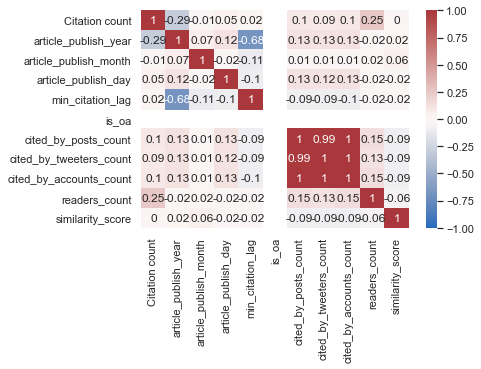

<Figure size 432x288 with 0 Axes>

In [ ]:
# Showing only the bottom half of our correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

matrix = df_policy_prediction2.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig('heatmap.png')

# matrix = df_policy_prediction2.corr().round(2)
# mask = np.triu(np.ones_like(matrix, dtype=bool))
# sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
# plt.show()

In [ ]:
min_citation_lag=df_policy_prediction2["min_citation_lag"]
len(min_citation_lag)

1421

In [ ]:
df_policy_prediction2.drop(columns=["cited_by_tweeters_count","cited_by_accounts_count", "min_citation_lag"], inplace=True)

In [ ]:
#from sklearn.inspection import permutation_importance

In [ ]:
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)
# result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
# perm_sorted_idx = result.importances_mean.argsort()

# tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
# tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
# ax1.set_yticks(tree_indices)
# ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
# ax1.set_ylim((0, len(clf.feature_importances_)))

# fig.tight_layout()
# plt.show()


In [ ]:
for row,value in publisher_subjects.publisher_subjects.iteritems():
        #print(row,value)    
        for each_dict in value:
            #print(each_dict)
            for key in each_dict.keys():
                if each_dict[key] not in df_policy_prediction2:
                    df_policy_prediction2[each_dict[key]]=0
                df_policy_prediction2.loc[row,each_dict[key]]= 1

In [ ]:
#scopus_subjects["scopus_subjects"]
for row,value in scopus_subjects.scopus_subjects.iteritems(): 
    #print(row,type(value))
    for item in value:
        #print(item)
        if item not in df_policy_prediction2:
            df_policy_prediction2[item]=0
        df_policy_prediction2.loc[row,item]=1

In [ ]:
for row,value in cohorts.cohorts.iteritems():
        #print(len(value))
        if(len(value)):
            for item in value.keys():
                if item not in df_policy_prediction2:
                    df_policy_prediction2[item]=0
                df_policy_prediction2.loc[row,item]= value[item]

In [ ]:
for row, value in contexts.context.iteritems(): 
        #print(value)
        for each_key, each_value in value.items():
            #print(each_key)        
            for key in each_value.keys():       
                col="context_"+each_key+"_"+key
                #print(col)
                if col not in df_policy_prediction2.columns:
                    df_policy_prediction2[col]=0
                df_policy_prediction2[col]=each_value[key]


In [ ]:
for row,value in df_policy_prediction2.readers.iteritems():
    #print(value)
    if 'mendeley' in value.keys():
        if 'mendeley' not in df_policy_prediction2.columns:
                df_policy_prediction2['mendeley']=0
        #print(type(int(value['mendeley'])))
        df_policy_prediction2.loc[row,'mendeley']= int(value['mendeley'])
    

In [ ]:
df_policy_prediction2.drop(columns=["publisher_subjects","scopus_subjects","cohorts","context","readers"], inplace=True)

In [ ]:
df_policy_prediction2.columns

Index(['Title', 'Journal', 'Citation count', 'article_publish_year',
       'article_publish_month', 'article_publish_day', 'type', 'is_oa',
       'cited_by_posts_count', 'readers_count',
       ...
       'context_similar_age_3m_mean', 'context_similar_age_3m_rank',
       'context_similar_age_3m_pct', 'context_similar_age_3m_higher_than',
       'context_similar_age_journal_3m_count',
       'context_similar_age_journal_3m_mean',
       'context_similar_age_journal_3m_rank',
       'context_similar_age_journal_3m_pct',
       'context_similar_age_journal_3m_higher_than', 'mendeley'],
      dtype='object', length=355)

In [ ]:
len(df_policy_prediction2)

1421

In [ ]:
#df_policy_prediction2.drop(columns=["publisher_subjects","scopus_subjects","cohorts","context","readers"], inplace=True)

In [ ]:
#one-hot encoding
categorical_cols = ['type', 'Journal', 'is_oa'] 
df_policy_prediction2 = pd.get_dummies(df_policy_prediction2, columns = categorical_cols)

In [ ]:
df_policy_prediction2.columns


Index(['Title', 'Citation count', 'article_publish_year',
       'article_publish_month', 'article_publish_day', 'cited_by_posts_count',
       'readers_count', 'similarity_score',
       'Public Health And Health Services', 'era',
       ...
       'Journal_Tobacco Control', 'Journal_Toxicological Sciences',
       'Journal_Translational Psychiatry', 'Journal_Tree Physiology',
       'Journal_Trials', 'Journal_Unknown', 'Journal_Virchows Archiv',
       'Journal_Virology Journal', 'Journal_npj Vaccines', 'is_oa_False'],
      dtype='object', length=699)

In [ ]:
#correlation

In [ ]:
#df_policy_prediction2["readers_count"].value_counts()
#df_policy_prediction2["cited_by_posts_count"].value_counts()
#df_policy_prediction2["mendeley"].value_counts()

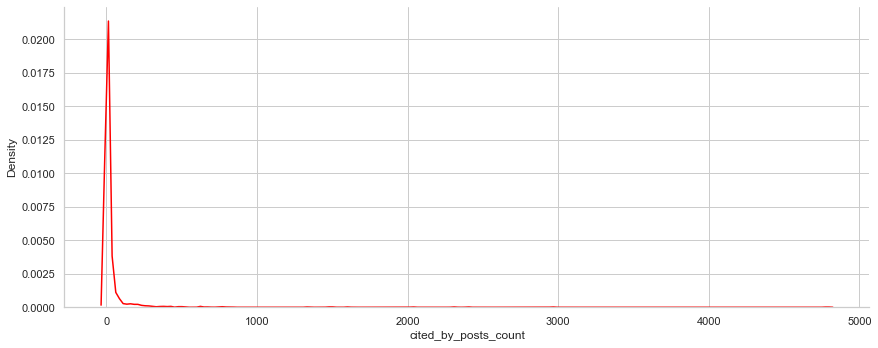

In [ ]:
sns.set_style(style="whitegrid")
sns.displot(df_policy_prediction2["cited_by_posts_count"], kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(15, 5)

In [ ]:
#log2 conversion
df_policy_prediction2['cited_by_posts_count_log'] = np.log2(df_policy_prediction2['cited_by_posts_count'])
df_policy_prediction2[['cited_by_posts_count_log','cited_by_posts_count']]

,cited_by_posts_count_log,cited_by_posts_count
0,1.584963,3
1,0.000000,1
2,2.584963,6
3,3.807355,14
4,2.321928,5
...,...,...
1416,2.584963,6
1417,1.584963,3
1418,1.584963,3
1419,2.584963,6


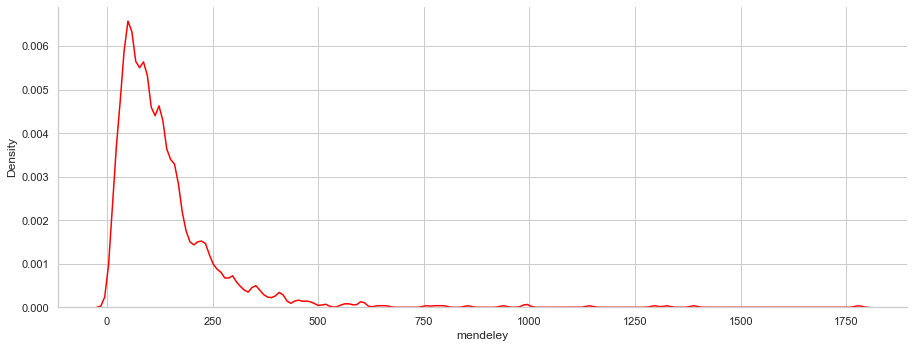

In [ ]:
sns.set_style(style="whitegrid")
sns.displot(df_policy_prediction2["mendeley"], kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(15, 5)

In [ ]:
#log2 conversion
df_policy_prediction2['mendeley_log'] = np.log2(df_policy_prediction2['mendeley'])
df_policy_prediction2[['mendeley_log','mendeley']]

C:\Users\Z1936043\Anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mendeley_log,mendeley
0,7.442943,174
1,5.000000,32
2,6.714246,105
3,5.954196,62
4,7.539159,186
...,...,...
1416,8.247928,304
1417,6.169925,72
1418,6.321928,80
1419,6.426265,86


In [ ]:
df_policy_prediction2.drop(columns=["cited_by_posts_count"], inplace=True)
df_policy_prediction2.drop(columns=["mendeley"], inplace=True)
df_policy_prediction2.drop(columns=["readers_count"], inplace=True)

In [ ]:
df_policy_prediction2.columns

Index(['Title', 'Citation count', 'article_publish_year',
       'article_publish_month', 'article_publish_day', 'similarity_score',
       'Public Health And Health Services', 'era', 'Clinical Sciences',
       'Psychology',
       ...
       'Journal_Translational Psychiatry', 'Journal_Tree Physiology',
       'Journal_Trials', 'Journal_Unknown', 'Journal_Virchows Archiv',
       'Journal_Virology Journal', 'Journal_npj Vaccines', 'is_oa_False',
       'cited_by_posts_count_log', 'mendeley_log'],
      dtype='object', length=698)

In [ ]:
"min_citation_lag" in df_policy_prediction1.columns

True

In [ ]:

#Title
#context_count'#context.describe()
#cited_by_posts_count//logreg
#mendely
#readers_count
df_policy_prediction3=df_policy_prediction2.copy()

In [ ]:
# tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
# train_vect = tfidf.fit_transform(df_policy_prediction2['Title'])
#text_preprocessing(str(df_policy_prediction2['Title']))

In [ ]:
#df_policy_prediction3["Citation count"].value_counts()

In [ ]:
df_policy_prediction3.replace([np.inf, -np.inf], np.nan, inplace=True)
df_policy_prediction3.fillna(0,inplace=True)

In [ ]:
#target_column = ['Citation count'] 
exclude_column= ['Citation count','min_citation_lag','Title'] #,'Title'
predictors = list(set(list(df_policy_prediction3.columns))-set(exclude_column))
X_citation = df_policy_prediction3[predictors]
y_citation = df_policy_prediction3['Citation count']


In [ ]:
X_imp=df_policy_prediction3.drop("Title",axis=1)

In [ ]:
# feature extraction
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_imp, y_citation)
mean=clf.feature_importances_.mean()
maximum=clf.feature_importances_.max()
feature_importance = clf.feature_importances_
print(mean)
print(maximum)
print(feature_importance.shape)
X_graph = list()
Y_graph = list()
all_features_importance=sorted(zip(feature_importance, X_imp),reverse=True)
#print(type(all_features_importance))
for importance, name in all_features_importance:
    if importance:
       # print ('Feature: ',name,', ','Importance: ', importance,sep='')
        X_graph.append(name)
        Y_graph.append(importance)

0.0014347202295552368
0.07740912952310713
(697,)


In [ ]:
from statistics import mean
m=mean(Y_graph)
selected_features_importance=[i for i in Y_graph if i > m]
len(selected_features_importance)

30

In [ ]:
#selected_features_importance

In [ ]:
important_featuresX=[]
importance_of_featuresY=[]
for importance, name in all_features_importance:
    if importance in selected_features_importance:
        print ('Feature: ',name,', ','Importance: ', importance,sep='')
        important_featuresX.append(name)
        importance_of_featuresY.append(importance)

Feature: Citation count, Importance: 0.07740912952310713
Feature: Education, Importance: 0.06749842425937733
Feature: mendeley_log, Importance: 0.060361336171169906
Feature: Journal_Journal of Autism and Developmental Disorders, Importance: 0.045766431868328426
Feature: article_publish_year, Importance: 0.03739956815497925
Feature: Public Health, Importance: 0.03101492151150964
Feature: pub, Importance: 0.02988090119555049
Feature: Social Sciences, Importance: 0.028668496627736344
Feature: cited_by_posts_count_log, Importance: 0.02592757351678243
Feature: similarity_score, Importance: 0.024505232133383213
Feature: Biochemistry, Genetics and Molecular Biology, Importance: 0.023427360455853304
Feature: Pediatrics, Importance: 0.018311069435147917
Feature: Health Psychology, Importance: 0.016998806808834886
Feature: Biomedicine, general, Importance: 0.015445967406214617
Feature: article_publish_day, Importance: 0.015401474747979
Feature: Medicine, Importance: 0.014648915189921391
Feature:

<ipython-input-1451-805b14c62f5d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


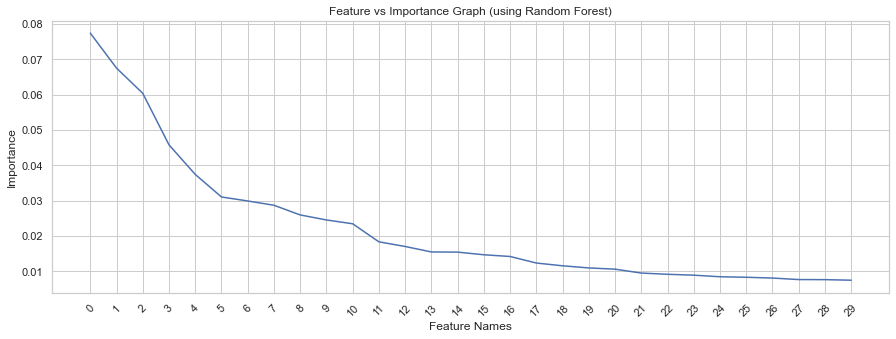

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(important_featuresX,importance_of_featuresY)

ax = plt.gca()
plt.draw()
ax.set_xticklabels(ax.get_xticks(), rotation = 45)

plt.title('Feature vs Importance Graph (using Random Forest)')
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.show()
#plt.xticks(rotation = 45)


In [ ]:
# important_featuresX.append('Citation count')
# important_featuresX.append('min_citation_lag')

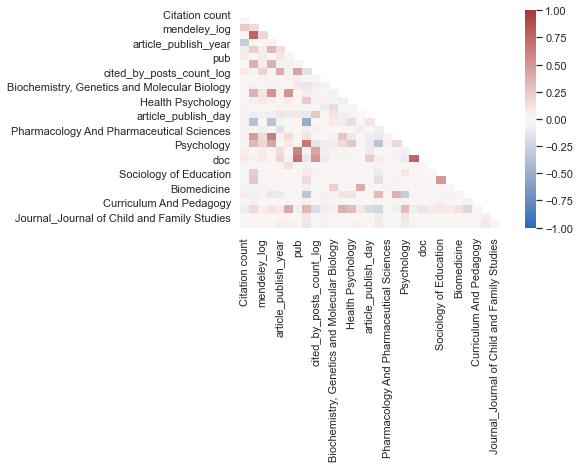

In [ ]:
matrix = df_policy_prediction3[important_featuresX].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [ ]:
#drop_features=["Child and School Psychology","pub","Journal_Journal of Autism and Developmental Disorders","Psychology And Cognitive Sciences","Public Health","Oncology","com","sci","doc","Psychology","Personality and Social Psychology","Education"]
drop_features=["pub","Journal_Journal of Autism and Developmental Disorders","Psychology And Cognitive Sciences","Public Health","sci","doc","Psychology","Education"]
important_featuresX_up=list(set(important_featuresX)-set(drop_features))


In [ ]:
df_policy_prediction4=df_policy_prediction3[important_featuresX]
df_policy_prediction4=df_policy_prediction4.drop(columns=drop_features, axis=1)

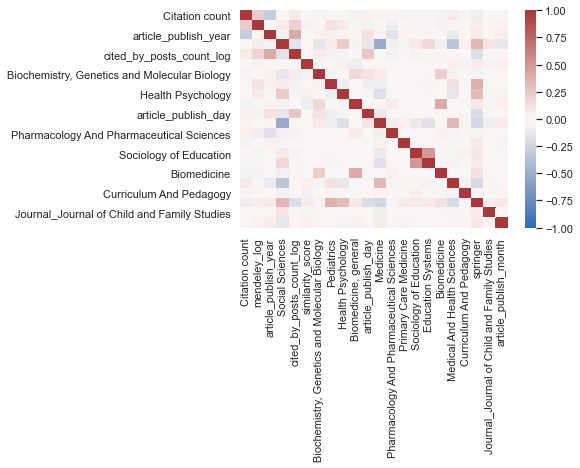

<Figure size 432x288 with 0 Axes>

In [ ]:
matrix = df_policy_prediction4.corr().round(2)
sns.heatmap(matrix, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
plt.savefig("x.png")

In [ ]:
without_sim=df_policy_prediction4.drop(["similarity_score","Citation count"],axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(without_sim,y_citation,test_size=0.2,train_size=0.8, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)
#linear
pred_train_lr= lr.predict(X1_train)
print("\nLinear Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_lr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_lr)))
print("Train_R2: ",r2_score(y1_train, pred_train_lr))

pred_test_lr= lr.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_lr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_lr))) 
print("Test_R2: ",r2_score(y1_test, pred_test_lr))

#ridge
rr = Ridge(alpha=0.01)
rr.fit(X1_train, y1_train) 
pred_train_rr= rr.predict(X1_train)
print("\nRidge Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_rr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_rr)))
print("Train_R2: ",r2_score(y1_train, pred_train_rr))

pred_test_rr= rr.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_rr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_rr))) 
print("Test_R2: ",r2_score(y1_test, pred_test_rr))

#lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X1_train, y1_train) 
pred_train_lasso= model_lasso.predict(X1_train)
print("\nLasso Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_lasso))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_lasso)))
print("Train_R2: ",r2_score(y1_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_lasso))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_lasso))) 
print("Test_R2: ",r2_score(y1_test, pred_test_lasso))

#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X1_train, y1_train) 
pred_train_enet= model_enet.predict(X1_train)
print("\nElastic net Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_enet))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_enet)))
print("Train_R2: ",r2_score(y1_train, pred_train_enet))

pred_test_enet= model_enet.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_enet))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_enet)))
print("Test_R2: ",r2_score(y1_test, pred_test_enet))


Linear Regression output:

Train_MSE:  3.488787507505982
Train_RMSE:  1.867829624860357
Train_R2:  0.19216690055961128
Test_MSE:  3.8313697194543797
Test_RMSE:  1.9573884947690838
Test_R2:  0.15539541480029873

Ridge Regression output:

Train_MSE:  3.488787560066882
Train_RMSE:  1.8678296389304037
Train_R2:  0.19216688838906926
Test_MSE:  3.8313066764504295
Test_RMSE:  1.957372390847084
Test_R2:  0.1554093122871245

Lasso Regression output:

Train_MSE:  3.524882886809556
Train_RMSE:  1.8774671466658361
Train_R2:  0.1838089704547975
Test_MSE:  3.800338237235824
Test_RMSE:  1.949445623051801
Test_R2:  0.16223613602703213

Elastic net Regression output:

Train_MSE:  3.5120767807761384
Train_RMSE:  1.8740535693453746
Train_R2:  0.18677424028177336
Test_MSE:  3.802501233578567
Test_RMSE:  1.950000316302171
Test_R2:  0.1617593152651059


In [ ]:
#y_citation

In [ ]:
with_sim=df_policy_prediction4.drop("Citation count",axis=1)
X_train, X_test, y_train, y_test = train_test_split(with_sim,y_citation,test_size=0.2,train_size=0.8, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#linear
pred_train_lr= lr.predict(X_train)
print("\nLinear Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_lr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("Train_R2: ",r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_lr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test_R2: ",r2_score(y_test, pred_test_lr))

#ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("\nRidge Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_rr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Train_R2: ",r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_rr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("Test_R2: ",r2_score(y_test, pred_test_rr))

#lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("\nLasso Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_lasso))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Train_R2: ",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_lasso))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Test_R2: ",r2_score(y_test, pred_test_lasso))

#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("\nElastic net Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_enet))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Train_R2: ",r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_enet))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Test_R2: ",r2_score(y_test, pred_test_enet))


Linear Regression output:

Train_MSE:  3.488719767506055
Train_RMSE:  1.867811491426813
Train_R2:  0.1921825858410965
Test_MSE:  3.829174109934982
Test_RMSE:  1.9568275626469958
Test_R2:  0.15587942495937457

Ridge Regression output:

Train_MSE:  3.4887198200364247
Train_RMSE:  1.8678115054888234
Train_R2:  0.1921825736776238
Test_MSE:  3.8291063542738923
Test_RMSE:  1.956810249940932
Test_R2:  0.15589436132579704

Lasso Regression output:

Train_MSE:  3.524882886809556
Train_RMSE:  1.8774671466658361
Train_R2:  0.1838089704547975
Test_MSE:  3.800338237235824
Test_RMSE:  1.949445623051801
Test_R2:  0.16223613602703213

Elastic net Regression output:

Train_MSE:  3.5119652269780612
Train_RMSE:  1.8740238064064345
Train_R2:  0.18680007070287563
Test_MSE:  3.801307138322149
Test_RMSE:  1.9496941140399817
Test_R2:  0.16202254706015184


# Min Citation lag prediction
min_citation_lag

In [ ]:
min_citation_lag=min_citation_lag.fillna(0)

In [ ]:
#list(min_citation_lag)

C:\Users\Z1936043\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


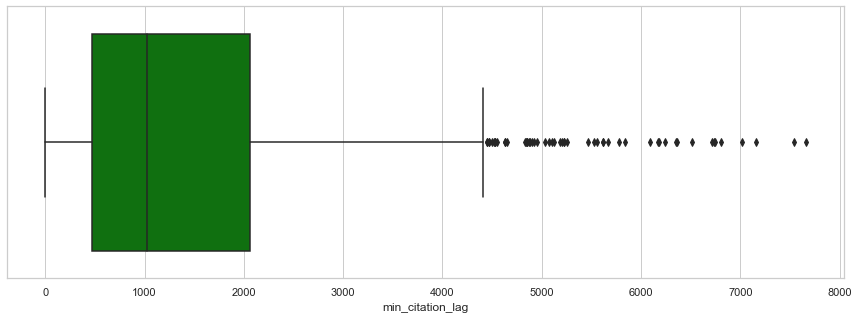

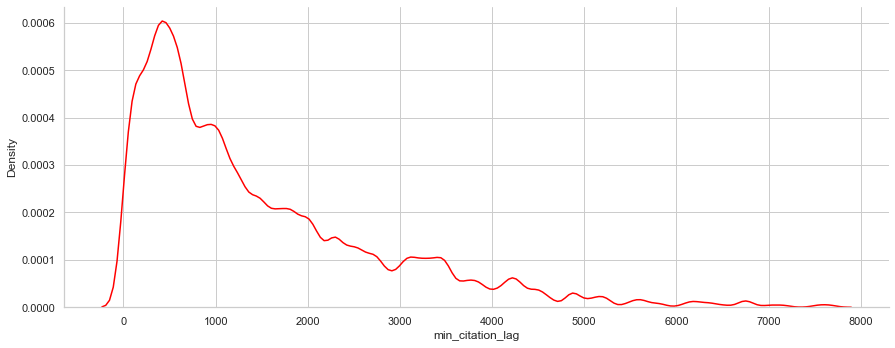

In [ ]:
sns.set_style(style="whitegrid")

#%matplotlib inline
#sns.set_theme(style="darkgrid")
#sns.set_palette("red")

sns.boxplot(min_citation_lag, color='green')
plt.gcf().set_size_inches(15, 5)
sns.displot(min_citation_lag, kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(15, 5)

In [ ]:
citation_lag_data=df_policy_prediction2[df_policy_prediction2['min_citation_lag'].isin(citation_lag_counts[(citation_lag_counts.index>=0) & (citation_lag_counts.index<=3900)].index)] # filter out twitter posts count with frequencies less than 20
#usa_data1=usa_data1[~usa_data1['Citation count'].isin(citations[(citations.values<10)].index)] #usa_data1[usa_data1['Citation count']<20] # filter out twitter posts count having values greater than 50
citation_lag_data['min_citation_lag'].value_counts()

0       9
3       1
4       1
7       1
10      1
       ..
6807    1
7012    1
7156    1
7540    1
7663    1
Name: min_citation_lag, Length: 1095, dtype: int64

In [ ]:
without_sim=df_policy_prediction4.drop(["similarity_score","Citation count"],axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(without_sim,min_citation_lag,test_size=0.2,train_size=0.8, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X1_train, y1_train)
#linear
pred_train_lr= lr.predict(X1_train)
print("\nLinear Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_lr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_lr)))
print("Train_R2: ",r2_score(y1_train, pred_train_lr))

pred_test_lr= lr.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_lr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_lr))) 
print("Test_R2: ",r2_score(y1_test, pred_test_lr))

#ridge
rr = Ridge(alpha=0.01)
rr.fit(X1_train, y1_train) 
pred_train_rr= rr.predict(X1_train)
print("\nRidge Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_rr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_rr)))
print("Train_R2: ",r2_score(y1_train, pred_train_rr))

pred_test_rr= rr.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_rr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_rr))) 
print("Test_R2: ",r2_score(y1_test, pred_test_rr))

#lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X1_train, y1_train) 
pred_train_lasso= model_lasso.predict(X1_train)
print("\nLasso Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_lasso))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_lasso)))
print("Train_R2: ",r2_score(y1_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_lasso))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_lasso))) 
print("Test_R2: ",r2_score(y1_test, pred_test_lasso))

#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X1_train, y1_train) 
pred_train_enet= model_enet.predict(X1_train)
print("\nElastic net Regression output:\n")
print("Train_MSE: ",mean_squared_error(y1_train,pred_train_enet))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y1_train,pred_train_enet)))
print("Train_R2: ",r2_score(y1_train, pred_train_enet))

pred_test_enet= model_enet.predict(X1_test)
print("Test_MSE: ",mean_squared_error(y1_test,pred_test_enet))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y1_test,pred_test_enet)))
print("Test_R2: ",r2_score(y1_test, pred_test_enet))

In [ ]:
with_sim=df_policy_prediction4.drop("Citation count",axis=1)
X_train, X_test, y_train, y_test = train_test_split(with_sim,y_citation,test_size=0.2,train_size=0.8, random_state = 0)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#linear
pred_train_lr= lr.predict(X_train)
print("\nLinear Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_lr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("Train_R2: ",r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_lr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("Test_R2: ",r2_score(y_test, pred_test_lr))

#ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("\nRidge Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_rr))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Train_R2: ",r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_rr))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("Test_R2: ",r2_score(y_test, pred_test_rr))

#lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("\nLasso Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_lasso))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("Train_R2: ",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_lasso))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("Test_R2: ",r2_score(y_test, pred_test_lasso))

#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("\nElastic net Regression output:\n")
print("Train_MSE: ",mean_squared_error(y_train,pred_train_enet))
print("Train_RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("Train_R2: ",r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print("Test_MSE: ",mean_squared_error(y_test,pred_test_enet))
print("Test_RMSE: ",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("Test_R2: ",r2_score(y_test, pred_test_enet))

In [ ]:










sns.set_style(style="whitegrid")

#%matplotlib inline
#sns.set_theme(style="darkgrid")
#sns.set_palette("red")

sns.boxplot(citation_lag_data["min_citation_lag"], color='green')
plt.gcf().set_size_inches(15, 5)
sns.displot(citation_lag_data["min_citation_lag"], kind="kde", bw_adjust=.25, color='red')
plt.gcf().set_size_inches(15, 5)


citation_lag_data=citation_lag_data.reset_index(drop=True)
len(citation_lag_data)
citation_lag_data.head()

In [ ]:
# features=important_featuresX
# predictors=important_featuresX
# features.append('Citation count')
# features.append('Title')
# #predictors.append('Title')

In [ ]:
#important_featuresX_up

In [ ]:
df_policy_prediction4=df_policy_prediction3[features]
df_policy_prediction4 = df_policy_prediction4.fillna(0)
#df_policy_prediction3=df_policy_prediction3.drop(["mendeley_log"],axis=1)

In [ ]:
for (row,value) in enumerate(df_policy_prediction4["Title"]):
    #print(row,value)
    df_policy_prediction4.loc[row,'title_up']=text_preprocessing(str(value)) 

In [ ]:
#text_preprocessing(df_policy_prediction2['Title']))
df_policy_prediction4=df_policy_prediction4.drop("Title", axis=1)

In [ ]:
df_policy_prediction4=df_policy_prediction4.rename(columns={'title_up': "Title"})

In [ ]:
#"Title" in df_policy_prediction4.columns

True

In [ ]:
from sklearn_pandas import DataFrameMapper 
#Add the features of the dataframe that you want to transform and/or combine
mapper = DataFrameMapper([
     ('Title', TfidfVectorizer()),(predictors,None)
    
 ])
 
"""
Use the fit_transform method to transform the old dataframe into a new one
that can be fed to the machine learning algorithm.
"""
 
#sample Usage
features1 = mapper.fit_transform(df_policy_prediction4)
categories = df_policy_prediction4['Citation count']

 
# # # Split the data between train and test
# x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)
 
# # clf = sk.RandomForestClassifier(random_state=0)
# # clf.fit(x, y)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(x, y)
 
# predicted = clf.predict(x_test)
 
# print(classification_report(y_test, predicted))

TypeError: no supported conversion for types: (dtype('float64'), dtype('O'))

In [ ]:
df_policy_prediction5=df_policy_prediction2.copy()

In [ ]:
df_policy_prediction2["Citation count"].value_counts()

1    409
2    341
3    220
4    125
5     96
6     86
7     73
8     71
Name: Citation count, dtype: int64

In [ ]:
list1

['mendeley_log',
 'Journal_Journal of Autism and Developmental Disorders',
 'Education',
 'article_publish_year',
 'cited_by_posts_count_log',
 'Neurosciences',
 'pub',
 'Child and School Psychology',
 'Public Health',
 'Pediatrics',
 'Psychology',
 'doc',
 'article_publish_day',
 'Health Sciences',
 'Medicine',
 'sci',
 'Biochemistry, Genetics and Molecular Biology',
 'Psychology And Cognitive Sciences',
 'Personality and Social Psychology',
 'Life Sciences',
 'Surgery',
 'Oncology',
 'com',
 'Social Sciences',
 'springer',
 'Biomedicine',
 'Economic Geography',
 'Nutrition And Dietetics',
 'Journal_Infectious Diseases and Therapy',
 'Law and Psychology',
 'Journal_Journal of Cancer Survivorship',
 'similarity_score',
 'Sociology of Education']

0       9
391     8
483     6
270     6
595     6
       ..
2669    1
630     1
631     1
2680    1
2046    1
Name: min_citation_lag, Length: 1095, dtype: int64

C:\Users\Z1936043\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


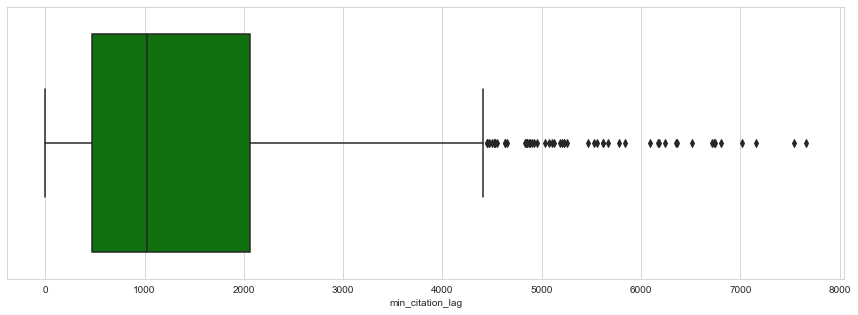

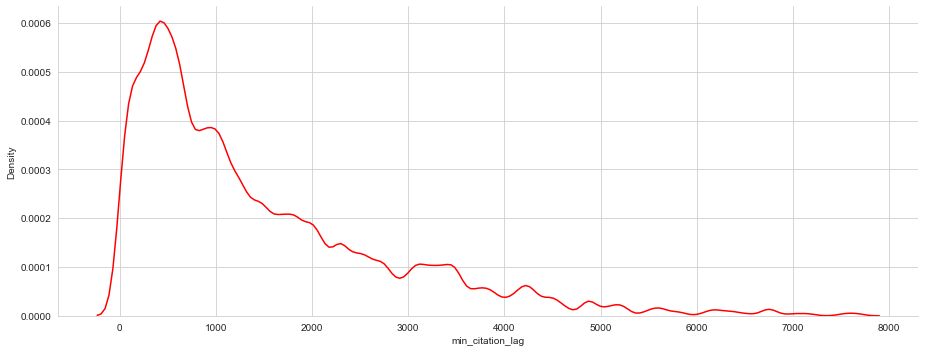

0       9
3       1
4       1
7       1
10      1
       ..
6807    1
7012    1
7156    1
7540    1
7663    1
Name: min_citation_lag, Length: 1095, dtype: int64

0       9
391     8
270     6
483     6
595     6
       ..
636     1
640     1
2689    1
642     1
2046    1
Name: min_citation_lag, Length: 1010, dtype: int64

C:\Users\Z1936043\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


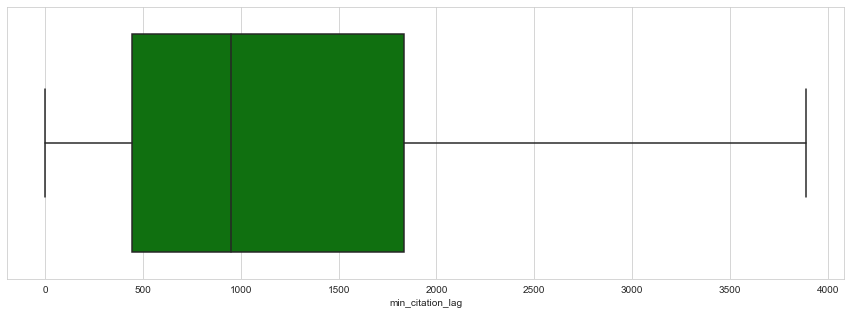

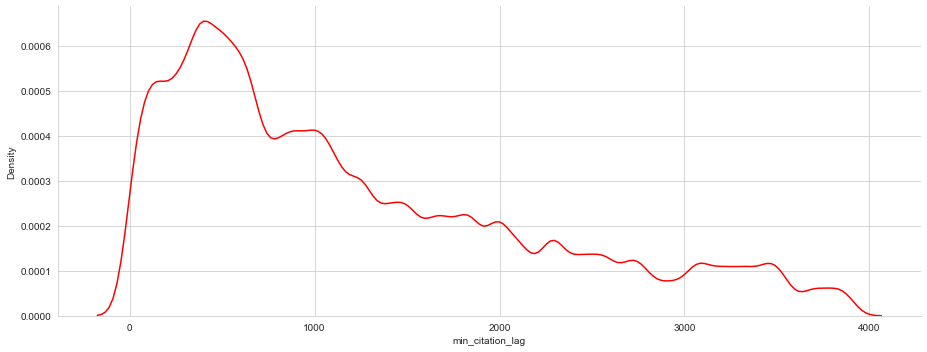

In [ ]:
!pip3 install stop_words

In [ ]:
text_preprocessing(str(df_policy_prediction2['Title'].values))

'competency based medical training review commentary the baby is thrown out with the bathwater older people and voting participation past and future older driver involvements in police reported crashes and fatal crashes trends and projections brief report driving and young adults with asd parents experiences drinking substance use and the operation of motor vehicles by young adolescents in canada mobile phone text message intervention to reduce binge drinking among young adults study protocol for a randomized controlled trial'

In [ ]:
df_policy_prediction2['Title'].values

array(['Competency based medical training: review * Commentary: The baby is thrown out with the bathwater',
       'Older people and voting participation: past and future',
       'Older driver involvements in police reported crashes and fatal crashes: trends and projections',
       ...,
       'Brief Report: Driving and Young Adults with ASD: Parents’ Experiences',
       'Drinking, Substance Use and the Operation of Motor Vehicles by Young Adolescents in Canada',
       'Mobile phone text message intervention to reduce binge drinking among young adults: study protocol for a randomized controlled trial'],
      dtype=object)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z1936043\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
corpus = df_policy_prediction2['Title'].values
# Creating the transform
cv = TfidfVectorizer()
# Get the shape of Vector
x = cv.fit_transform(corpus)

In [ ]:
x.shape

(1421, 3810)

In [ ]:
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(corpus).toarray()

In [ ]:
X_train.drop("Title",axis=1,inplace=True)

C:\Users\Z1936043\Anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[52  9  4  2  3  1  1  2]
 [33 21 13  3  1  2  4  2]
 [14 14  9  2  1  2  0  0]
 [10  7  2  1  2  0  2  0]
 [ 7  2  0  0  0  1  3  0]
 [ 5  7  3  1  2  0  3  0]
 [ 1  7  4  2  0  1  0  1]
 [ 7  4  3  0  0  0  2  0]]
              precision    recall  f1-score   support

           1       0.40      0.70      0.51        74
           2       0.30      0.27      0.28        79
           3       0.24      0.21      0.23        42
           4       0.09      0.04      0.06        24
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        16

    accuracy                           0.29       285
   macro avg       0.13      0.15      0.13       285
weighted avg       0.23      0.29      0.25       285

0.2912280701754386


In [ ]:
# regression
# #with similarity
# #without similarity
# policy citation
# min_citation_lag


In [ ]:
target_column = ['Citation count'] 
exclude_column= ['Citation count','min_citation_lag'] #,'Title'
predictors = list(set(list(df_policy_prediction2.columns))-set(exclude_column))

# df_policy_prediction2[predictors] = df_policy_prediction2[predictors]/df_policy_prediction2[predictors].max()
# df_policy_prediction2.describe()

In [ ]:
exclude_column1= ['Citation count','min_citation_lag','Title']
predictors1 = list(set(list(df_policy_prediction3.columns))-set(exclude_column1))

In [ ]:
# target_column = ['Citation count'] 
# exclude_column= ['Citation count','min_citation_lag'] #,'Title'
# predictors = list(set(list(df_policy_prediction2.columns))-set(exclude_column))
X = df_policy_prediction2[predictors]
y = df_policy_prediction2['Citation count']

In [ ]:
y = df_policy_prediction2['Citation count']
y.shape

(1421,)

In [ ]:
df_policy_prediction2["Citation count"].shape
#df_policy_prediction2['Citation count'].fillna('')

(1421,)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Columns: 699 entries, Journal_Research and Practice in Technology Enhanced Learning to Internal Medicine
dtypes: float64(6), int64(345), object(1), uint8(347)
memory usage: 4.3+ MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [ ]:

 
categories = data['index']
desc = data['Title'].fillna('')

In [ ]:
df_policy_prediction3.describe()

,Citation count,article_publish_year,article_publish_month,article_publish_day,similarity_score,Public Health And Health Services,era,Clinical Sciences,Psychology,Cardiovascular Medicine And Haematology,...,Journal_Toxicological Sciences,Journal_Translational Psychiatry,Journal_Tree Physiology,Journal_Trials,Journal_Unknown,Journal_Virchows Archiv,Journal_Virology Journal,Journal_npj Vaccines,is_oa_False,cited_by_posts_count_log
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.0,1421.000000
mean,3.044335,2012.469388,6.651654,2.722730,0.701929,0.195637,0.877551,0.097818,0.273047,0.008445,...,0.007741,0.002111,0.000704,0.004926,0.000704,0.000704,0.000704,0.000704,1.0,2.643239
std,2.089580,5.332726,3.853713,5.434291,0.227709,0.396830,0.327919,0.297174,0.445682,0.091539,...,0.087673,0.045915,0.026528,0.070038,0.026528,0.026528,0.026528,0.026528,0.0,2.238534
min,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.000000,2009.000000,3.000000,1.000000,0.683773,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,2.000000,2013.000000,6.000000,1.000000,0.765928,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.321928
75%,4.000000,2016.000000,10.000000,1.000000,0.827578,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.906891
max,8.000000,2021.000000,12.000000,29.000000,0.970816,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,12.224906


In [ ]:
x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)


In [ ]:
df_policy_prediction3=df_policy_prediction2.copy()
df_policy_prediction3 = df_policy_prediction3.fillna(0)
df_policy_prediction3=df_policy_prediction3.drop(["mendeley_log"],axis=1)


In [ ]:
exclude_column1= ['Citation count','min_citation_lag','Title']
predictors1 = list(set(list(df_policy_prediction3.columns))-set(exclude_column1))

In [ ]:
# x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)


# df_policy_prediction3=df_policy_prediction2.copy()
# df_policy_prediction3 = df_policy_prediction3.fillna(0)
# df_policy_prediction3=df_policy_prediction3.drop(["mendeley_log"],axis=1)


# exclude_column1= ['Citation count','min_citation_lag','Title']
# predictors1 = list(set(list(df_policy_prediction3.columns))-set(exclude_column1))


from sklearn_pandas import DataFrameMapper 
#Add the features of the dataframe that you want to transform and/or combine
mapper = DataFrameMapper([
     ('Title', TfidfVectorizer()),(predictors1,None)
    
 ])
 
"""
Use the fit_transform method to transform the old dataframe into a new one
that can be fed to the machine learning algorithm.
"""
 
#sample Usage
features = mapper.fit_transform(df_policy_prediction3)
categories = df_policy_prediction3['Citation count']

 
# # Split the data between train and test
x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)
 
# clf = sk.RandomForestClassifier(random_state=0)
# clf.fit(x, y)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y)
 
predicted = clf.predict(x_test)
 
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           1       0.26      1.00      0.42        74
           2       0.80      0.05      0.10        79
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        16

    accuracy                           0.27       285
   macro avg       0.13      0.13      0.06       285
weighted avg       0.29      0.27      0.13       285



C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z1936043\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
_ = mapper.fit_transform(df_policy_prediction3)

reversed_list = list(reversed(mapper.transformed_names_))
reversed_list[-1]

'Title_000'

In [ ]:
features.shape

(1421, 3810)

In [ ]:
data5 = pd.DataFrame({    'col1': ['yes', 'no', 'yes'],'col2': [True, False, False], 'col3': ['one', 'two', 'three']})

In [ ]:
data5

,col1,col2,col3
0,yes,True,one
1,no,False,two
2,yes,False,three


In [ ]:
predictors1

In [ ]:
df_policy_prediction3.describe()

,Citation count,article_publish_year,article_publish_month,article_publish_day,similarity_score,Public Health And Health Services,era,Clinical Sciences,Psychology,Cardiovascular Medicine And Haematology,...,Journal_Toxicological Sciences,Journal_Translational Psychiatry,Journal_Tree Physiology,Journal_Trials,Journal_Unknown,Journal_Virchows Archiv,Journal_Virology Journal,Journal_npj Vaccines,is_oa_False,cited_by_posts_count_log
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.0,1421.000000
mean,3.044335,2012.469388,6.651654,2.722730,0.701929,0.195637,0.877551,0.097818,0.273047,0.008445,...,0.007741,0.002111,0.000704,0.004926,0.000704,0.000704,0.000704,0.000704,1.0,2.643239
std,2.089580,5.332726,3.853713,5.434291,0.227709,0.396830,0.327919,0.297174,0.445682,0.091539,...,0.087673,0.045915,0.026528,0.070038,0.026528,0.026528,0.026528,0.026528,0.0,2.238534
min,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.000000,2009.000000,3.000000,1.000000,0.683773,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,2.000000,2013.000000,6.000000,1.000000,0.765928,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.321928
75%,4.000000,2016.000000,10.000000,1.000000,0.827578,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.906891
max,8.000000,2021.000000,12.000000,29.000000,0.970816,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,12.224906


In [ ]:
df_policy_prediction2=df_policy_prediction2.drop(["readers_count_log"],axis=1)

In [ ]:
df_policy_prediction3=df_policy_prediction3.drop(["mendeley_log"],axis=1)

In [ ]:
df_policy_prediction2[df_policy_prediction2["mendeley_log"].isna()]

,Title,Citation count,article_publish_year,article_publish_month,article_publish_day,similarity_score,Public Health And Health Services,era,Clinical Sciences,Psychology,...,Journal_Translational Psychiatry,Journal_Tree Physiology,Journal_Trials,Journal_Unknown,Journal_Virchows Archiv,Journal_Virology Journal,Journal_npj Vaccines,is_oa_False,cited_by_posts_count_log,mendeley_log


In [ ]:
#df_policy_prediction2[target_column].values.ravel()

LinearRegression()

2.2744431889183083
1.5081257205280694
0.4733498423587186
9.169569306402916e+18
3028129671.332276
-2.021381606992826e+18


2.274823400643453
1.5082517696470483
0.47326180385946737
4.747162287006092
2.1787983585008717
-0.046486068398387204


3.3398704169864333
1.8275312355706628
0.22664883863558505
3.667115201080473
1.9149713316602086
0.19160442868218708


3.23591463126734
1.7988648173966102
0.2507199304981702
3.6704006441279664
1.91582897047935
0.19088017065816099


In [ ]:
#Evaluation

In [ ]:
for col in data.columns:
   # print(data[["journal"]])
    ["DOI","journal",'score',"published_on","article_pdf",]
    ["cohorts"]=='[]'
    ["Article funder(s)"]==NaN

In [ ]:
Journal, Cited by source ID, Cited by title, Cited by type, Cited by subtype, 
Cited by URL, policy_year,month,days

In [ ]:
result.drop("k", axis=1, inplace=True)

In [ ]:
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D1
2,K3,A3,B3,C3,D3


In [ ]:
final_scores1=[0.8605784773826599, 0.8434368968009949, 0.0, 0.5813189744949341, 0.8717470169067383, 0.8887493014335632, 0.5725585222244263, 0.6441656351089478, 0.8425895571708679, 0.6978461146354675, 0.6723464131355286, 0.0, 0.8357273936271667, 0.7806251049041748, 0.0, 0.8680106997489929, 0.8517946600914001, 0.8221024870872498, 0.8792784214019775, 0.8027791976928711, 0.7912564277648926, 0.7961459755897522, 0.8458092212677002, 0.8918874263763428, 0.7963195443153381, 0.8708276748657227, 0.7941568493843079, 0.0, 0.7835923433303833, 0.7976151704788208, 0.9168403148651123, 0.8753156661987305, 0.7582477927207947, 0.8863105177879333, 0.5904787182807922, 0.814753532409668, 0.6358226537704468, 0.844184398651123, 0.8577870726585388, 0.8683043718338013, 0.8998451232910156, 0.8943077921867371, 0.8153216242790222, 0.7979365587234497, 0.8698849678039551, 0.7748280763626099, 0.8842503428459167, 0.8803125619888306, 0.7684593200683594, 0.7865551710128784, 0.6794167757034302, 0.6232789158821106, 0.7225621938705444, 0.8919147849082947, 0.8260850310325623, 0.5408157110214233, 0.7488793134689331, 0.7198996543884277, 0.7898022532463074, 0.8059267401695251, 0.7624764442443848, 0.7925820350646973, 0.7967373132705688, 0.8594354391098022, 0.5382493138313293, 0.8643637299537659, 0.0, 0.7465057969093323, 0.6797556281089783, 0.0, 0.8794240355491638, 0.7749291658401489, 0.6003068685531616, 0.7225719690322876, 0.5217340588569641, 0.5273177027702332, 0.7397911548614502, 0.7361403107643127, 0.7680399417877197, 0.840644896030426, 0.4754355549812317, 0.84226393699646, 0.7998786568641663, 0.7761874198913574, 0.8759681582450867, 0.8435586094856262, 0.7472249269485474, 0.7722048759460449, 0.8244407176971436, 0.8240606188774109, 0.6149612665176392, 0.8664737343788147, 0.7810475826263428, 0.6760249733924866, 0.7789076566696167, 0.5080939531326294, 0.6490812301635742, 0.7342866659164429, 0.0, 0.7928711175918579, 0.8551019430160522, 0.907353401184082, 0.0, 0.8986934423446655, 0.8393422365188599, 0.9503034353256226, 0.7598775029182434, 0.6206835508346558, 0.7618621587753296, 0.5955920219421387, 0.6749470233917236, 0.5734503865242004, 0.6707874536514282, 0.7964202761650085, 0.7684656381607056, 0.8322616815567017, 0.8350541591644287, 0.8497395515441895, 0.7920832633972168, 0.6684236526489258, 0.7025243043899536, 0.0, 0.7471656203269958, 0.0, 0.8596009016036987, 0.8814847469329834, 0.0, 0.7211602926254272, 0.8082917332649231, 0.7461379766464233, 0.7118263840675354, 0.5988777875900269, 0.6081199645996094, 0.8152259588241577, 0.7244023680686951, 0.7747988700866699, 0.7710427641868591, 0.8371201753616333, 0.7298473715782166, 0.8646858334541321, 0.6967823505401611, 0.8606177568435669, 0.649034857749939, 0.8515975475311279, 0.8334598541259766, 0.8071301579475403, 0.764228880405426, 0.840417206287384, 0.8431205749511719, 0.7491611242294312, 0.8116849660873413, 0.7342091798782349, 0.6884793639183044, 0.817960798740387, 0.7135193347930908, 0.8873506784439087, 0.8899471163749695, 0.6868590116500854, 0.7009897232055664, 0.7522009611129761, 0.7736276388168335, 0.7801274061203003, 0.8038699626922607, 0.453774631023407, 0.9120498895645142, 0.5520370602607727, 0.5168560147285461, 0.49358877539634705, 0.6380615234375, 0.804298996925354, 0.7503834962844849, 0.7705904245376587, 0.8870291709899902, 0.6813687086105347, 0.7520645260810852, 0.779726505279541, 0.7859916687011719, 0.5693196654319763, 0.7972403764724731, 0.6874490976333618, 0.7852392196655273, 0.7135593295097351, 0.8352841138839722, 0.6926096677780151, 0.8106521964073181, 0.0, 0.0, 0.7372874617576599, 0.6716514825820923, 0.8180029392242432, 0.8778764605522156, 0.8550780415534973, 0.6604495048522949, 0.760910153388977, 0.8366522789001465, 0.8561038374900818, 0.7657217979431152, 0.7205266356468201, 0.6885519027709961, 0.7318024039268494, 0.7477681636810303, 0.7767916917800903, 0.6584810614585876, 0.8147683143615723, 0.741683840751648, 0.7661839127540588, 0.8398313522338867, 0.7161730527877808, 0.6276049613952637, 0.7935547828674316, 0.7832643985748291, 0.0, 0.7577875852584839, 0.7068897485733032, 0.4305589199066162, 0.0, 0.8608989715576172, 0.8033865690231323, 0.0, 0.8357442617416382, 0.802287757396698, 0.8337595462799072, 0.7962100505828857, 0.8800554275512695, 0.8654683828353882, 0.8288314342498779, 0.7935055494308472, 0.7193077802658081, 0.8481466770172119, 0.8687155842781067, 0.8616795539855957, 0.8186925649642944, 0.7167460918426514, 0.805345892906189, 0.8151218891143799, 0.8079289197921753, 0.7112698554992676, 0.8637876510620117, 0.8284021615982056, 0.0, 0.7146704792976379, 0.7537087798118591, 0.7640597820281982, 0.0, 0.7812352180480957, 0.7364963889122009, 0.79805588722229, 0.7897136807441711, 0.7283380031585693, 0.8370137214660645, 0.7788018584251404, 0.7147895693778992, 0.6372955441474915, 0.0, 0.7249499559402466, 0.8484138250350952, 0.6977583765983582, 0.9001344442367554, 0.8508327603340149, 0.639274001121521, 0.7114465236663818, 0.7832847833633423, 0.7135330438613892, 0.6714386940002441, 0.7832862734794617, 0.6647467613220215, 0.8919361233711243, 0.7980955243110657, 0.7950987815856934, 0.6638805270195007, 0.6043542623519897, 0.7380253076553345, 0.745830774307251, 0.8515718579292297, 0.5979384183883667, 0.7319929599761963, 0.8791822791099548, 0.8364107012748718, 0.7499630451202393, 0.7550270557403564, 0.8149828910827637, 0.444918692111969, 0.7803274393081665, 0.8482798933982849, 0.8418668508529663, 0.7740527391433716, 0.8700752854347229, 0.723097562789917, 0.6629307270050049, 0.7501989006996155, 0.0, 0.6183723211288452, 0.6418403387069702, 0.5618874430656433, 0.8190213441848755, 0.7805265784263611, 0.6227039098739624, 0.7955074310302734, 0.7075133323669434, 0.7022449970245361, 0.6581875085830688, 0.7733285427093506, 0.0, 0.904491662979126, 0.7203601598739624, 0.6049562692642212, 0.7871838808059692, 0.6273303627967834, 0.5974064469337463, 0.7520106434822083, 0.8367465138435364, 0.6713966131210327, 0.6112846732139587, 0.3832598924636841, 0.6753587126731873, 0.0, 0.6729269027709961, 0.6539610028266907, 0.8475592732429504, 0.5607811212539673, 0.8067619800567627, 0.6850336194038391, 0.8355032801628113, 0.6898363828659058, 0.7133729457855225, 0.6023958325386047, 0.6526312828063965, 0.8480319976806641, 0.7026675343513489, 0.7417417764663696, 0.8431637287139893, 0.8644870519638062, 0.5721340179443359, 0.8179189562797546, 0.7905629873275757, 0.8183033466339111, 0.0, 0.7437934875488281, 0.7886943221092224, 0.3717181384563446, 0.736365020275116, 0.7801826000213623, 0.7569140791893005, 0.887871503829956, 0.8257786631584167, 0.8769881725311279, 0.8720090389251709, 0.8600990772247314, 0.8497536182403564, 0.7608808279037476, 0.8764390349388123, 0.8487908840179443, 0.7926545143127441, 0.7756708860397339, 0.82330322265625, 0.7950751781463623, 0.0, 0.7589449882507324, 0.0, 0.7675809860229492, 0.8183234930038452, 0.8885706663131714, 0.6065000295639038, 0.7219385504722595, 0.0, 0.6551528573036194, 0.8690588474273682, 0.8809317350387573, 0.7428395748138428, 0.9229312539100647, 0.810743510723114, 0.8294729590415955, 0.8182468414306641, 0.9121921062469482, 0.8069844245910645, 0.8009143471717834, 0.8725539445877075, 0.6697502732276917, 0.8870734572410583, 0.7852908372879028, 0.8859361410140991, 0.6905399560928345, 0.8251384496688843, 0.8566093444824219, 0.7970361709594727, 0.8694232106208801, 0.9204191565513611, 0.8436517715454102, 0.6851304769515991, 0.7865571975708008, 0.7552322149276733, 0.8781072497367859, 0.0, 0.7246062159538269, 0.7349672317504883, 0.8140360713005066, 0.8339320421218872, 0.7460904717445374, 0.886448860168457, 0.8969561457633972, 0.8779033422470093, 0.0, 0.7839323282241821, 0.809890627861023, 0.7588695883750916, 0.8434938192367554, 0.7365967035293579, 0.7537904381752014, 0.8243167996406555, 0.5056227445602417, 0.6959172487258911, 0.7370264530181885, 0.8547142744064331, 0.6480995416641235, 0.6107121706008911, 0.7833892107009888, 0.6457030773162842, 0.6996845602989197, 0.6670166850090027, 0.7616674304008484, 0.9223030805587769, 0.8233909606933594, 0.693537712097168, 0.8134759664535522, 0.6211618185043335, 0.8939961791038513, 0.7623512744903564, 0.6679310202598572, 0.8296037912368774, 0.8889890909194946, 0.6994230151176453, 0.7647659778594971, 0.7686783075332642, 0.8186139464378357, 0.7865571975708008, 0.8748276829719543, 0.7533301115036011, 0.8046724796295166, 0.0, 0.7580592632293701, 0.8693065643310547, 0.8202168941497803, 0.8516011238098145, 0.7357491850852966, 0.693011999130249, 0.7491399049758911, 0.8515726327896118, 0.0, 0.7512675523757935, 0.878327488899231, 0.6757510900497437, 0.8179759979248047, 0.9036805629730225, 0.851700484752655, 0.9020552635192871, 0.6734952330589294, 0.7611327767372131, 0.0, 0.6560556292533875, 0.88828045129776, 0.8369807004928589, 0.7176001071929932, 0.8707078099250793, 0.8354418277740479, 0.6464731693267822, 0.632501482963562, 0.7449418306350708, 0.6399645209312439, 0.9128541350364685, 0.8303377628326416, 0.7425203323364258, 0.8517262935638428, 0.8029124140739441, 0.6767228841781616, 0.8425484895706177, 0.7102770805358887, 0.764985203742981, 0.7970662713050842, 0.6869292259216309, 0.8035475611686707, 0.8769758343696594, 0.8315123319625854, 0.8416205048561096, 0.6741917133331299, 0.6284121870994568, 0.7961516380310059, 0.8212469816207886, 0.8002103567123413, 0.8160092830657959, 0.4921959638595581, 0.8265955448150635, 0.7535938620567322, 0.7635331153869629, 0.8790796399116516, 0.4412863254547119, 0.6661238670349121, 0.0, 0.7253476977348328, 0.8305994272232056, 0.6250238418579102, 0.8002103567123413, 0.6521919965744019, 0.7395311594009399, 0.6721999645233154, 0.8271257877349854, 0.8016120195388794, 0.857574462890625, 0.8671650886535645, 0.8003103733062744, 0.7597553730010986, 0.8159462213516235, 0.773531973361969, 0.6482822299003601, 0.8752413988113403, 0.7331395745277405, 0.55564945936203, 0.7211284637451172, 0.6889023184776306, 0.6772155165672302, 0.7985714673995972, 0.7271420955657959, 0.9242420196533203, 0.6953973770141602, 0.0, 0.6135327219963074, 0.9073485136032104, 0.7297686338424683, 0.8201811909675598, 0.6895252466201782, 0.0, 0.0, 0.774512767791748, 0.8071302175521851, 0.7031853199005127, 0.8054413199424744, 0.0, 0.7455652952194214, 0.0, 0.868040919303894, 0.7368286848068237, 0.834415078163147, 0.6484987139701843, 0.8381308913230896, 0.6707578897476196, 0.0, 0.7140551805496216, 0.7895881533622742, 0.8354373574256897, 0.8155902624130249, 0.7707656621932983, 0.6861376762390137, 0.8169193863868713, 0.7776641845703125, 0.8688172101974487, 0.743095874786377, 0.8509954214096069, 0.8135232925415039, 0.9105392694473267, 0.8461546897888184, 0.704109251499176, 0.7665988206863403, 0.7763045430183411, 0.8322770595550537, 0.7154407501220703, 0.7627343535423279, 0.6957533359527588, 0.6329079866409302, 0.5632283687591553, 0.6447582244873047, 0.7566821575164795, 0.8020450472831726, 0.9106419086456299, 0.8677771091461182, 0.8643718957901001, 0.8897414803504944, 0.9240049123764038, 0.8644856214523315, 0.7797647714614868, 0.818091869354248, 0.7277202010154724, 0.7993505001068115, 0.8774089813232422, 0.8374545574188232, 0.7642070055007935, 0.7635176181793213, 0.8099676370620728, 0.7077214121818542, 0.0, 0.7708027362823486, 0.8592026233673096, 0.8269427418708801, 0.8804614543914795, 0.5957525372505188, 0.8422324657440186, 0.8535270690917969, 0.8443915247917175, 0.0, 0.864646852016449, 0.6073131561279297, 0.7458193302154541, 0.818074107170105, 0.8855632543563843, 0.7757694721221924, 0.7867593765258789, 0.7482204437255859, 0.7766755819320679, 0.0, 0.0, 0.7446812987327576, 0.8023096323013306, 0.8767236471176147, 0.903224766254425, 0.0, 0.6870096325874329, 0.6341121196746826, 0.7242109775543213, 0.6705195903778076, 0.8374345302581787, 0.8580243587493896, 0.7263869047164917, 0.8201955556869507, 0.0, 0.6236536502838135, 0.916930615901947, 0.0, 0.865648090839386, 0.9067976474761963, 0.8398654460906982, 0.8635485172271729, 0.6894001960754395, 0.8775533437728882, 0.8141735196113586, 0.8765577077865601, 0.8489601612091064, 0.8187913298606873, 0.8044536113739014, 0.7678317427635193, 0.7786897420883179, 0.7498125433921814, 0.8292706608772278, 0.8621496558189392, 0.6919674277305603, 0.824770987033844, 0.7124320864677429, 0.9225317239761353, 0.8348788022994995, 0.7320178747177124, 0.7272842526435852, 0.7193519473075867, 0.8790265321731567, 0.7973506450653076, 0.8305301666259766, 0.8500494360923767, 0.6991879940032959, 0.9289857149124146, 0.6570950746536255, 0.7298440933227539, 0.8226048946380615, 0.8557142615318298, 0.7973233461380005, 0.7128863334655762, 0.8802165389060974, 0.8048348426818848, 0.6929134130477905, 0.7794974446296692, 0.0, 0.7304074168205261, 0.7772489786148071, 0.8110271096229553, 0.8601319789886475, 0.8401766419410706, 0.0, 0.8022685050964355, 0.8475388884544373, 0.760796070098877, 0.7588930130004883, 0.6076328158378601, 0.787950873374939, 0.7762497663497925, 0.0, 0.8546653985977173, 0.6759353280067444, 0.7306795120239258, 0.8066961765289307, 0.7079410552978516, 0.8544365167617798, 0.92143714427948, 0.8704192638397217, 0.5880630612373352, 0.6094257831573486, 0.845353901386261, 0.7933725714683533, 0.8859587907791138, 0.7127503156661987, 0.7676568031311035, 0.0, 0.8777162432670593, 0.7473771572113037, 0.5619032979011536, 0.7670655250549316, 0.7332541942596436, 0.0, 0.5082888007164001, 0.5457739233970642, 0.8232791423797607, 0.6180800199508667, 0.4123890995979309, 0.6854158043861389, 0.5504772067070007, 0.7063440084457397, 0.8165277242660522, 0.7562678456306458, 0.5032821297645569, 0.7991541624069214, 0.7753516435623169, 0.7551258206367493, 0.7955316305160522, 0.7910222411155701, 0.8160425424575806, 0.8606961965560913, 0.7903563976287842, 0.8232211470603943, 0.7063440084457397, 0.6949636340141296, 0.7605950832366943, 0.7940959334373474, 0.7764360904693604, 0.6938216090202332, 0.85588538646698, 0.7841326594352722, 0.9011516571044922, 0.7531614303588867, 0.6163492798805237, 0.7946195602416992, 0.7760294675827026, 0.7607695460319519, 0.7558380961418152, 0.6345278024673462, 0.8412212133407593, 0.8191818594932556, 0.5233492255210876, 0.7394143342971802, 0.7099623084068298, 0.7563824653625488, 0.7267250418663025, 0.7095251083374023, 0.0, 0.0, 0.8372905850410461, 0.9097688794136047, 0.5397067070007324, 0.7585563659667969, 0.0, 0.8910225629806519, 0.0, 0.0, 0.8192116022109985, 0.0, 0.707221269607544, 0.0, 0.6768519878387451, 0.8669345378875732, 0.930846095085144, 0.0, 0.0, 0.8385146260261536, 0.9045791625976562, 0.6454341411590576, 0.8073632717132568, 0.8388791084289551, 0.7554402351379395, 0.0, 0.9124786853790283, 0.0, 0.9128435254096985, 0.8341501951217651, 0.747413158416748, 0.8193938732147217, 0.8340873718261719, 0.861785352230072, 0.7913311719894409, 0.9215806722640991, 0.7073792815208435, 0.0, 0.7888134717941284, 0.0, 0.77486252784729, 0.837908148765564, 0.9656476974487305, 0.0, 0.860907793045044, 0.6557170748710632, 0.8077296018600464, 0.8242745995521545, 0.7976645827293396, 0.7519605755805969, 0.6655461192131042, 0.0, 0.8962653875350952, 0.8772002458572388, 0.6079851984977722, 0.7825735807418823, 0.8697354793548584, 0.6959869861602783, 0.0, 0.8641095757484436, 0.0, 0.7904676795005798, 0.0, 0.7624926567077637, 0.8335681557655334, 0.7574409246444702, 0.7958536148071289, 0.8141591548919678, 0.7180926203727722, 0.7897192239761353, 0.7105896472930908, 0.8694144487380981, 0.8682026863098145, 0.7851080894470215, 0.7682410478591919, 0.625885009765625, 0.8099861145019531, 0.864182710647583, 0.9240109920501709, 0.0, 0.8785941004753113, 0.876282274723053, 0.8758695125579834, 0.8250676393508911, 0.8314372897148132, 0.7018516659736633, 0.8437658548355103, 0.0, 0.8692760467529297, 0.9046376347541809, 0.8243515491485596, 0.8904275894165039, 0.7462605237960815, 0.6949774026870728, 0.6285780072212219, 0.8550903797149658, 0.7421247959136963, 0.8013895153999329, 0.5477911829948425, 0.9354475736618042, 0.8688172101974487, 0.7177853584289551, 0.7849933505058289, 0.7725275754928589, 0.7796750068664551, 0.5503983497619629, 0.8434236645698547, 0.7803820371627808, 0.0, 0.6791912317276001, 0.8798558712005615, 0.8276391625404358, 0.8007808923721313, 0.726165235042572, 0.8103510141372681, 0.8266087174415588, 0.7593498229980469, 0.7100500464439392, 0.9263622164726257, 0.7987525463104248, 0.8610663414001465, 0.8319427967071533, 0.7759650349617004, 0.6705784797668457, 0.0, 0.732636034488678, 0.7710684537887573, 0.6757713556289673, 0.7138716578483582, 0.7921833992004395, 0.5039436221122742, 0.782511830329895, 0.644492506980896, 0.743176281452179, 0.7148730754852295, 0.7425526976585388, 0.827578067779541, 0.5313425660133362, 0.0, 0.8419173955917358, 0.8031783103942871, 0.7254698872566223, 0.8702977895736694, 0.6474493145942688, 0.6302106380462646, 0.7322201728820801, 0.8265662789344788, 0.334344744682312, 0.0, 0.7903999090194702, 0.8228762745857239, 0.7412751913070679, 0.8679845333099365, 0.8087092638015747, 0.922343909740448, 0.8108925819396973, 0.7637783288955688, 0.8601933121681213, 0.6737998127937317, 0.8834347724914551, 0.6992254257202148, 0.6714051961898804, 0.8136246204376221, 0.8506332039833069, 0.8679176568984985, 0.6693621873855591, 0.3885248005390167, 0.8635517954826355, 0.7160874009132385, 0.8746673464775085, 0.0, 0.8653997182846069, 0.5426468849182129, 0.6780643463134766, 0.864296555519104, 0.7926336526870728, 0.8405466675758362, 0.9478171467781067, 0.0, 0.7968958020210266, 0.5494749546051025, 0.607882022857666, 0.7517638206481934, 0.8063395023345947, 0.8814089894294739, 0.6287179589271545, 0.7863861322402954, 0.625720739364624, 0.6922296285629272, 0.7182016372680664, 0.8329643607139587, 0.8001772165298462, 0.6706447005271912, 0.9096308350563049, 0.7734206914901733, 0.0, 0.0, 0.6993510127067566, 0.725663423538208, 0.6435246467590332, 0.6881127953529358, 0.8985998034477234, 0.7791194319725037, 0.6440610885620117, 0.625732421875, 0.7731854915618896, 0.6603310108184814, 0.7881556153297424, 0.7818078398704529, 0.7044237852096558, 0.6796151399612427, 0.7106407880783081, 0.6216294765472412, 0.7069635391235352, 0.7604943513870239, 0.8574734926223755, 0.7571638822555542, 0.8359799385070801, 0.7142006158828735, 0.6753382682800293, 0.6789770722389221, 0.6577807068824768, 0.8581839203834534, 0.7790806293487549, 0.7537860870361328, 0.6960839629173279, 0.674190104007721, 0.7838144302368164, 0.8872768878936768, 0.8014564514160156, 0.8329240083694458, 0.737991213798523, 0.7087163925170898, 0.9064157009124756, 0.6158304214477539, 0.6389507055282593, 0.7665250301361084, 0.6520319581031799, 0.6270691156387329, 0.68034428358078, 0.0, 0.8044313788414001, 0.8429760932922363, 0.791597843170166, 0.0, 0.7808579206466675, 0.8462765216827393, 0.800567626953125, 0.0, 0.853064775466919, 0.7946304082870483, 0.7491819858551025, 0.6234577298164368, 0.7986279726028442, 0.8591980338096619, 0.7050179243087769, 0.8553884625434875, 0.6205183863639832, 0.6916344165802002, 0.5006107687950134, 0.71611487865448, 0.6909959316253662, 0.7599136829376221, 0.802712619304657, 0.7884560823440552, 0.6612362265586853, 0.6868726015090942, 0.6533976793289185, 0.8298327922821045, 0.6423915028572083, 0.0, 0.714432418346405, 0.8610498905181885, 0.724084734916687, 0.7650530338287354, 0.8219248056411743, 0.6881651878356934, 0.828872799873352, 0.7615171074867249, 0.7263728380203247, 0.6903331875801086, 0.6065267324447632, 0.7811956405639648, 0.7630981206893921, 0.0, 0.8790954947471619, 0.7855992317199707, 0.8045635223388672, 0.7710410952568054, 0.641207754611969, 0.6407194137573242, 0.7588130831718445, 0.6783632040023804, 0.7584675550460815, 0.6252439022064209, 0.808407723903656, 0.7507303953170776, 0.7496973872184753, 0.7048162221908569, 0.8015506863594055, 0.7816122770309448, 0.9091912508010864, 0.7465738654136658, 0.6249258518218994, 0.8425685167312622, 0.8499435186386108, 0.7039830684661865, 0.6968114972114563, 0.6387858390808105, 0.685433030128479, 0.791274905204773, 0.6819087266921997, 0.7694541215896606, 0.7804437875747681, 0.7732015252113342, 0.8568766117095947, 0.6630870699882507, 0.7874919176101685, 0.7473002672195435, 0.8343758583068848, 0.9036487340927124, 0.6061432361602783, 0.6084699034690857, 0.7797737121582031, 0.7733327150344849, 0.8890390992164612, 0.7910544872283936, 0.8150874376296997, 0.704749345779419, 0.8470267057418823, 0.6384164094924927, 0.8767340183258057, 0.7454569935798645, 0.0, 0.6977893114089966, 0.7533577680587769, 0.6810756921768188, 0.8400465250015259, 0.6196138262748718, 0.7659283876419067, 0.6053470969200134, 0.7234833836555481, 0.7266582250595093, 0.6837728023529053, 0.7452325820922852, 0.0, 0.866514265537262, 0.8498939871788025, 0.7330116629600525, 0.903098464012146, 0.6118474006652832, 0.9102411270141602, 0.6315616965293884, 0.6391746401786804, 0.7793172597885132, 0.6923179626464844, 0.7262804508209229, 0.6765075922012329, 0.7622314095497131, 0.7950650453567505, 0.8567731380462646, 0.7692587375640869, 0.5897269248962402, 0.7502480149269104, 0.0, 0.7464702129364014, 0.7081338763237, 0.7410361766815186, 0.0, 0.49154797196388245, 0.7759715914726257, 0.0, 0.0, 0.0, 0.7710210084915161, 0.8621333241462708, 0.7487787008285522, 0.0, 0.8153555989265442, 0.820346474647522, 0.8098820447921753, 0.8093611598014832, 0.8101312518119812, 0.7992392778396606, 0.7467132210731506, 0.7156771421432495, 0.8484065532684326, 0.0, 0.7198517322540283, 0.7753951549530029, 0.670434832572937, 0.7772042751312256, 0.7593390941619873, 0.8412785530090332, 0.8651617765426636, 0.5691642761230469, 0.8054143190383911, 0.7062435746192932, 0.8998583555221558, 0.7122796177864075, 0.811252236366272, 0.7634637355804443, 0.4539586901664734, 0.0, 0.7743450999259949, 0.7298135161399841, 0.8406041264533997, 0.0, 0.0, 0.8268792629241943, 0.8701574802398682, 0.7354998588562012, 0.8776343464851379, 0.0, 0.8222054839134216, 0.8776343464851379, 0.0, 0.8770557045936584, 0.9107047915458679, 0.8605025410652161, 0.0, 0.8956746459007263, 0.8532988429069519, 0.8107978105545044, 0.7349942922592163, 0.8386794328689575, 0.5833755731582642, 0.8978787660598755, 0.8044527769088745, 0.0, 0.7225548028945923, 0.5986539125442505, 0.0, 0.7802608609199524, 0.0, 0.6902592778205872, 0.702656090259552, 0.5339811444282532, 0.7247715592384338, 0.8881388306617737, 0.6226987838745117, 0.7568552494049072, 0.7152957916259766, 0.7323797941207886, 0.8217929005622864, 0.7090479731559753, 0.8278590440750122, 0.8272836208343506, 0.7876343727111816, 0.8843440413475037, 0.8051336407661438, 0.7081960439682007, 0.7568991780281067, 0.7950814962387085, 0.8019685745239258, 0.8855319023132324, 0.7017595767974854, 0.8285971879959106, 0.0, 0.8597058653831482, 0.8146058320999146, 0.7549252510070801, 0.0, 0.8022900819778442, 0.7587853074073792, 0.7604978084564209, 0.8544947504997253, 0.0, 0.7067076563835144, 0.6694779396057129, 0.8924607634544373, 0.7544616460800171, 0.0, 0.7083739042282104, 0.8462976217269897, 0.9708155989646912, 0.8236278295516968, 0.7088371515274048, 0.8742815256118774, 0.7981157302856445, 0.6484216451644897, 0.7584124207496643, 0.815144419670105, 0.7185221910476685, 0.6973029375076294, 0.8010854125022888, 0.8196471929550171, 0.7492855191230774, 0.764153242111206, 0.8176218867301941, 0.8113677501678467, 0.7683311700820923, 0.783597469329834, 0.7377157211303711, 0.7698434591293335, 0.6890445947647095, 0.7343588471412659, 0.735794186592102, 0.7152748107910156, 0.7599077224731445, 0.0, 0.721527099609375, 0.8484900593757629, 0.8128609657287598, 0.7621006965637207, 0.8271194696426392, 0.0, 0.5174322128295898, 0.7412922978401184, 0.6585279703140259, 0.8648189306259155, 0.8070483207702637, 0.7964006066322327, 0.779979944229126, 0.5585333704948425, 0.6700623035430908, 0.740904688835144, 0.785275399684906, 0.7192505598068237, 0.0, 0.8045519590377808, 0.668914794921875, 0.7723685503005981, 0.5419951677322388, 0.7794883251190186, 0.7258024215698242, 0.72702956199646, 0.7859959006309509, 0.7856172323226929, 0.8728361129760742, 0.7750847339630127, 0.7543931007385254, 0.5563108325004578, 0.6341450214385986, 0.7139264345169067, 0.8737361431121826, 0.781325101852417, 0.7001861333847046, 0.6991235017776489, 0.6746190190315247, 0.7871372103691101, 0.7162253260612488, 0.7009860277175903, 0.8118546009063721, 0.8076167106628418, 0.5767511129379272, 0.855083703994751, 0.732273280620575, 0.5825964212417603, 0.8461501598358154, 0.6924717426300049, 0.8276475071907043, 0.648301362991333, 0.7008476257324219, 0.7566699981689453, 0.5962324142456055, 0.0, 0.7496681213378906, 0.8533648252487183, 0.6854689717292786, 0.6766849756240845, 0.6241623163223267, 0.7105919122695923, 0.5043042302131653, 0.4809231758117676, 0.6092140674591064, 0.8942114114761353, 0.81107497215271, 0.0, 0.7987680435180664, 0.8418576717376709, 0.6977616548538208, 0.7134124636650085, 0.8771319389343262, 0.7588710784912109, 0.7566777467727661, 0.5781487226486206, 0.6578927636146545, 0.6816359758377075, 0.4741809368133545, 0.3717521131038666, 0.8103346824645996, 0.6274059414863586, 0.9010375738143921, 0.8221280574798584, 0.812856912612915, 0.7481170296669006, 0.608589768409729, 0.6075804233551025, 0.8201112747192383, 0.6603372097015381, 0.8092535734176636, 0.7024550437927246, 0.8199909329414368, 0.6540356874465942, 0.8021093010902405, 0.7656716108322144, 0.7022212147712708, 0.6925239562988281, 0.822685956954956, 0.8479115962982178, 0.6722509264945984, 0.612415611743927, 0.6930407285690308, 0.7766816020011902, 0.8071016073226929, 0.7294952273368835, 0.8119157552719116, 0.7675793170928955, 0.7396251559257507, 0.7881301641464233, 0.8147764205932617, 0.614424467086792, 0.7733743786811829, 0.3738135099411011, 0.5966328382492065, 0.7426131367683411, 0.7629663348197937, 0.782673716545105, 0.8256363868713379, 0.5561791658401489, 0.5925387144088745, 0.737551748752594, 0.6532792448997498, 0.8105524778366089, 0.8235125541687012, 0.7631278038024902, 0.7302802205085754, 0.763617992401123, 0.8305343389511108, 0.8695520162582397, 0.7394996285438538, 0.6637427806854248, 0.8169450759887695, 0.7752478718757629, 0.6463745832443237, 0.7796793580055237, 0.5427982807159424, 0.7763240933418274, 0.7764150500297546, 0.9023972153663635, 0.8198566436767578, 0.7499586939811707, 0.8568065762519836, 0.8430243730545044, 0.8292508125305176, 0.8646706938743591, 0.6905620098114014, 0.7317547798156738, 0.741762101650238, 0.8269652724266052, 0.7226938009262085, 0.0, 0.8415569067001343, 0.649552583694458, 0.8624036312103271, 0.6013782620429993, 0.7889184951782227, 0.819607675075531, 0.7261233925819397, 0.7810796499252319, 0.6781120896339417, 0.8920904397964478, 0.0, 0.748241662979126, 0.6252819299697876, 0.7949428558349609, 0.7423847317695618, 0.845474123954773, 0.8305807709693909, 0.7467666864395142, 0.6564023494720459, 0.0, 0.7486279010772705, 0.7136708498001099, 0.6326574087142944, 0.8286803960800171]

In [ ]:
print(len(final_scores1))

1423
